In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

# EDA

In [2]:
train_df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
109,110,1,3,"Moran, Miss. Bertha",female,NaN,1,0,371110,24.1500,NaN,Q
181,182,0,2,"Pernot, Mr. Rene",male,NaN,0,0,SC/PARIS 2131,15.0500,NaN,C
227,228,0,3,"Lovell, Mr. John Hall (""Henry"")",male,20.5,0,0,A/5 21173,7.2500,NaN,S
266,267,0,3,"Panula, Mr. Ernesti Arvid",male,16.0,4,1,3101295,39.6875,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0000,NaN,S


In [3]:
test_df.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
16,908,2,"Keane, Mr. Daniel",male,35.0,0,0,233734,12.3500,NaN,Q
353,1245,2,"Herman, Mr. Samuel",male,49.0,1,2,220845,65.0000,NaN,S
396,1288,3,"Colbert, Mr. Patrick",male,24.0,0,0,371109,7.2500,NaN,Q
379,1271,3,"Asplund, Master. Carl Edgar",male,5.0,4,2,347077,31.3875,NaN,S
211,1103,3,"Finoli, Mr. Luigi",male,NaN,0,0,SOTON/O.Q. 3101308,7.0500,NaN,S


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [6]:
train_df.describe(include=["O"])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Ridsdale, Miss. Lucy",male,347082,B96 B98,S
freq,1,577,7,4,644


In [7]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
cabin_names = pd.Series(index=train_df.index)
cabin_names[~train_df["Cabin"].isnull()] = [x[0] for x in train_df["Cabin"][~train_df["Cabin"].isnull()].values]
cabin_names = cabin_names.fillna("NONE")
train_df["CabinName"] = cabin_names
cabin_names = pd.Series(index=test_df.index)
cabin_names[~test_df["Cabin"].isnull()] = [x[0] for x in test_df["Cabin"][~test_df["Cabin"].isnull()].values]
cabin_names = cabin_names.fillna("NONE")
test_df["CabinName"] = cabin_names

/Users/tomfujii/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.
/Users/tomfujii/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """


In [9]:
train_df["FamilySize"] = train_df["SibSp"] + train_df["Parch"]
test_df["Family_Size"] = test_df["SibSp"] + test_df["Parch"]

In [10]:
train_df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CabinName,FamilySize
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.000,C148,C,C,0
715,716,0,3,"Soholt, Mr. Peter Andreas Lauritz Andersen",male,19.0,0,0,348124,7.650,F G73,S,F,0
711,712,0,1,"Klaber, Mr. Herman",male,NaN,0,0,113028,26.550,C124,S,C,0
593,594,0,3,"Bourke, Miss. Mary",female,NaN,0,2,364848,7.750,NaN,Q,NONE,2
667,668,0,3,"Rommetvedt, Mr. Knud Paust",male,NaN,0,0,312993,7.775,NaN,S,NONE,0


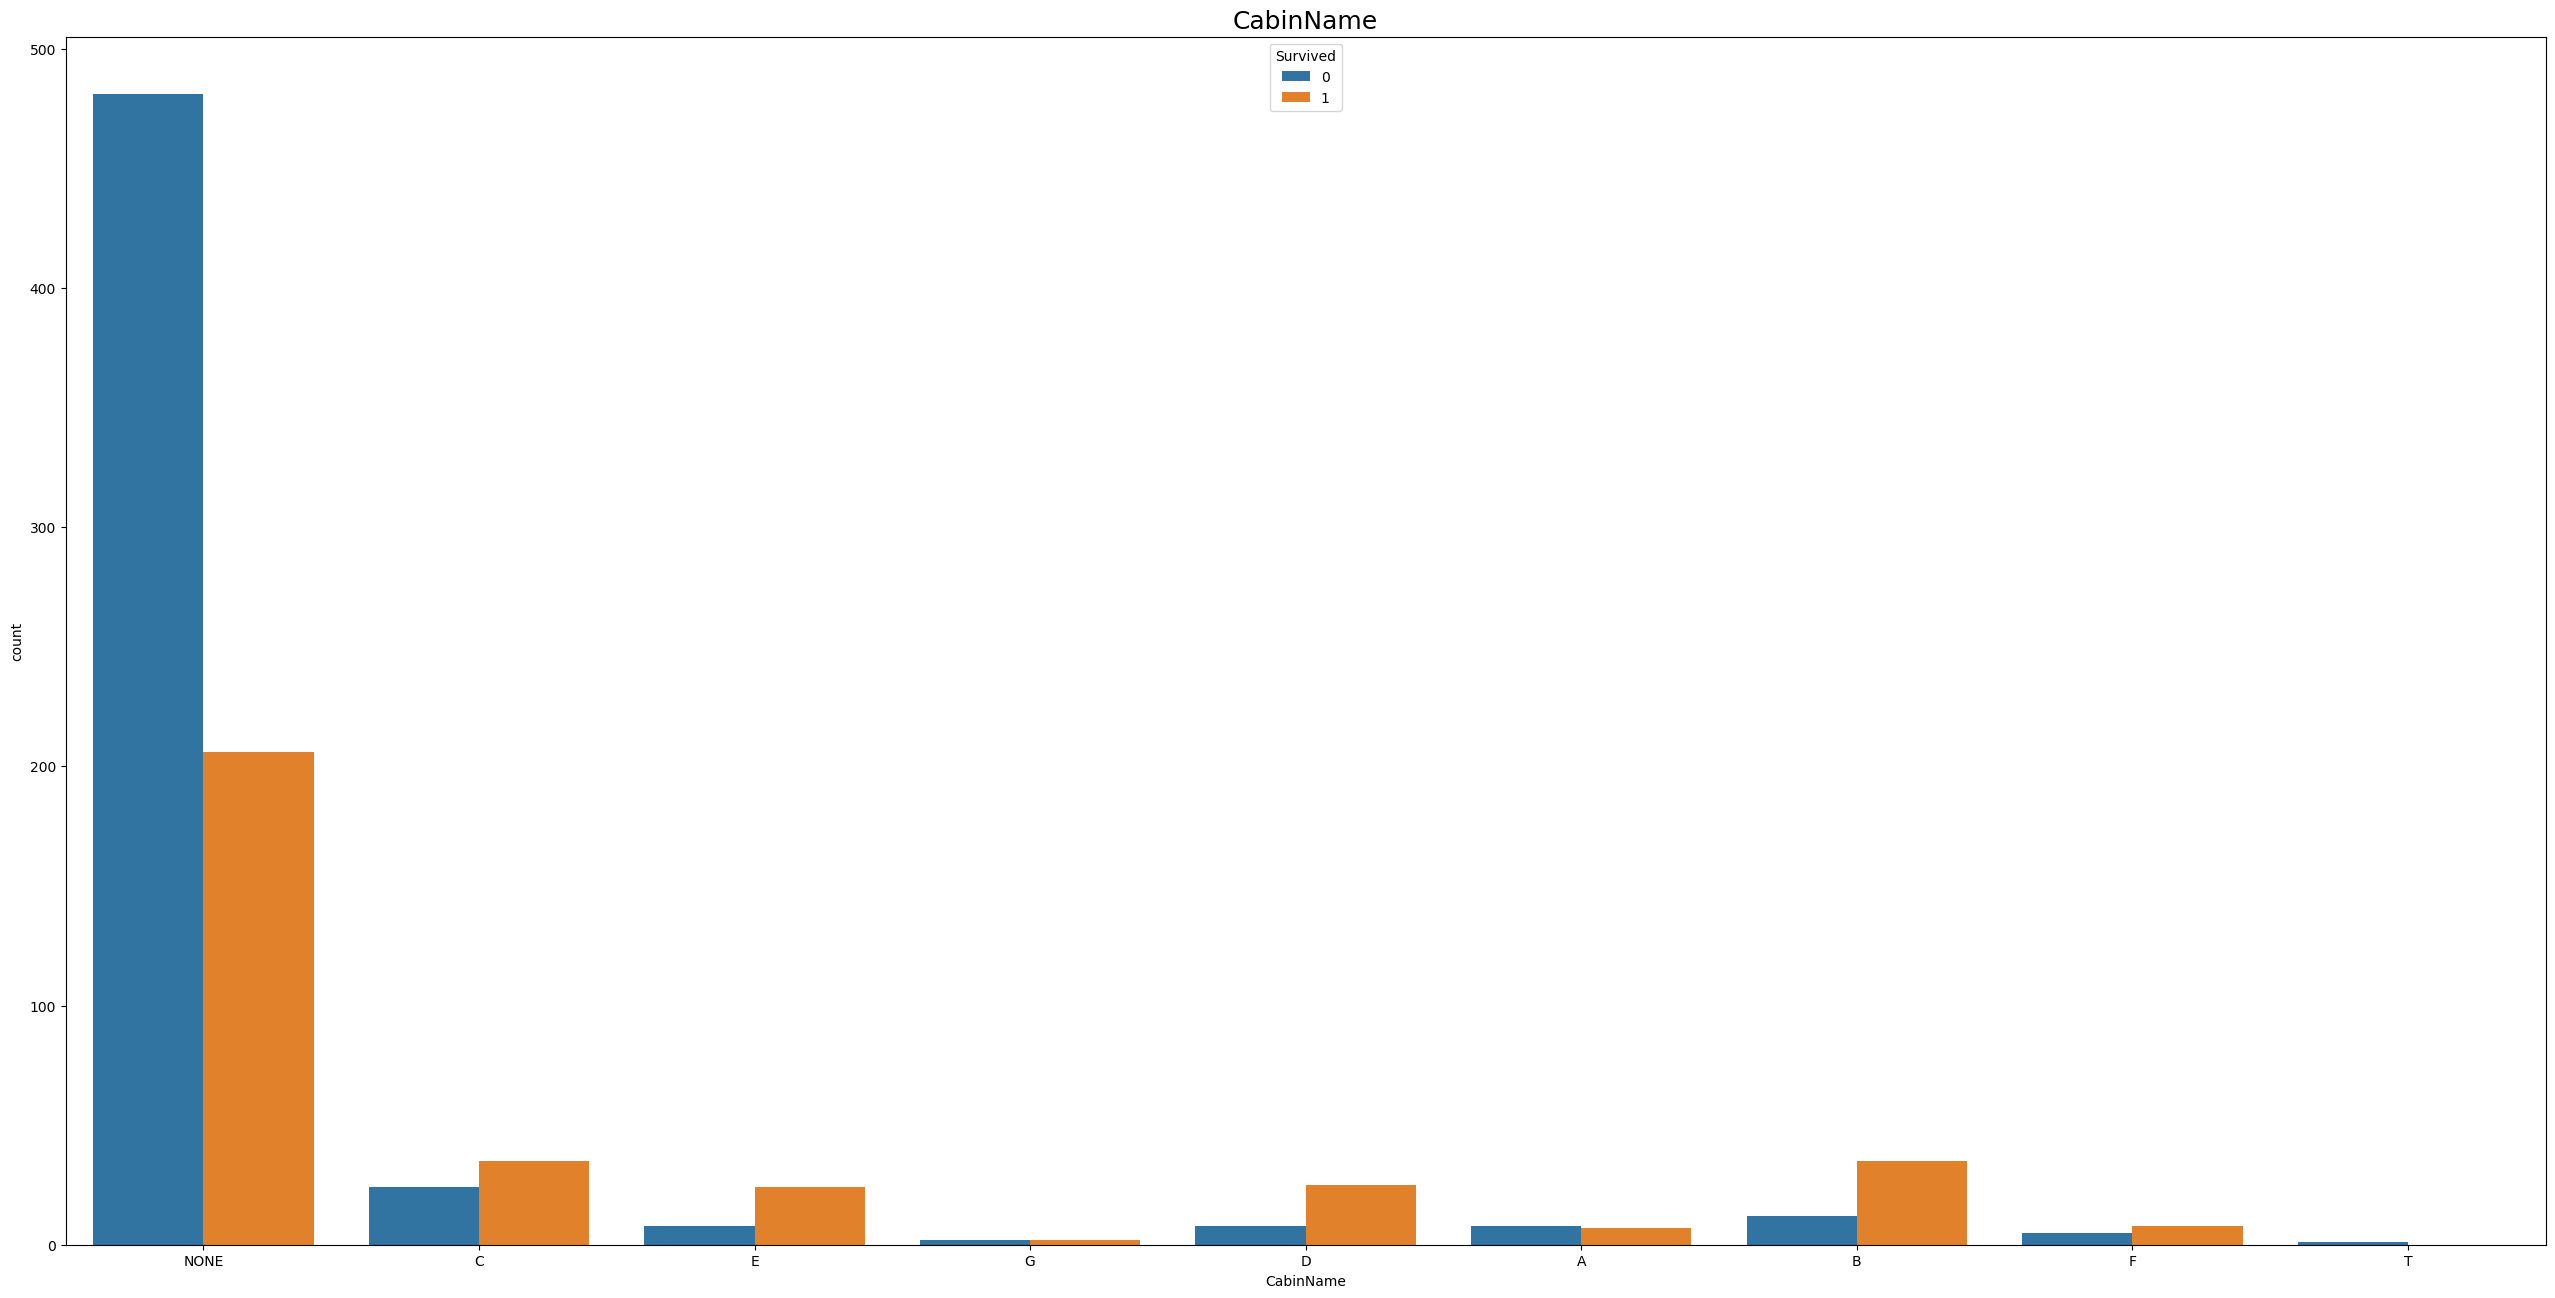

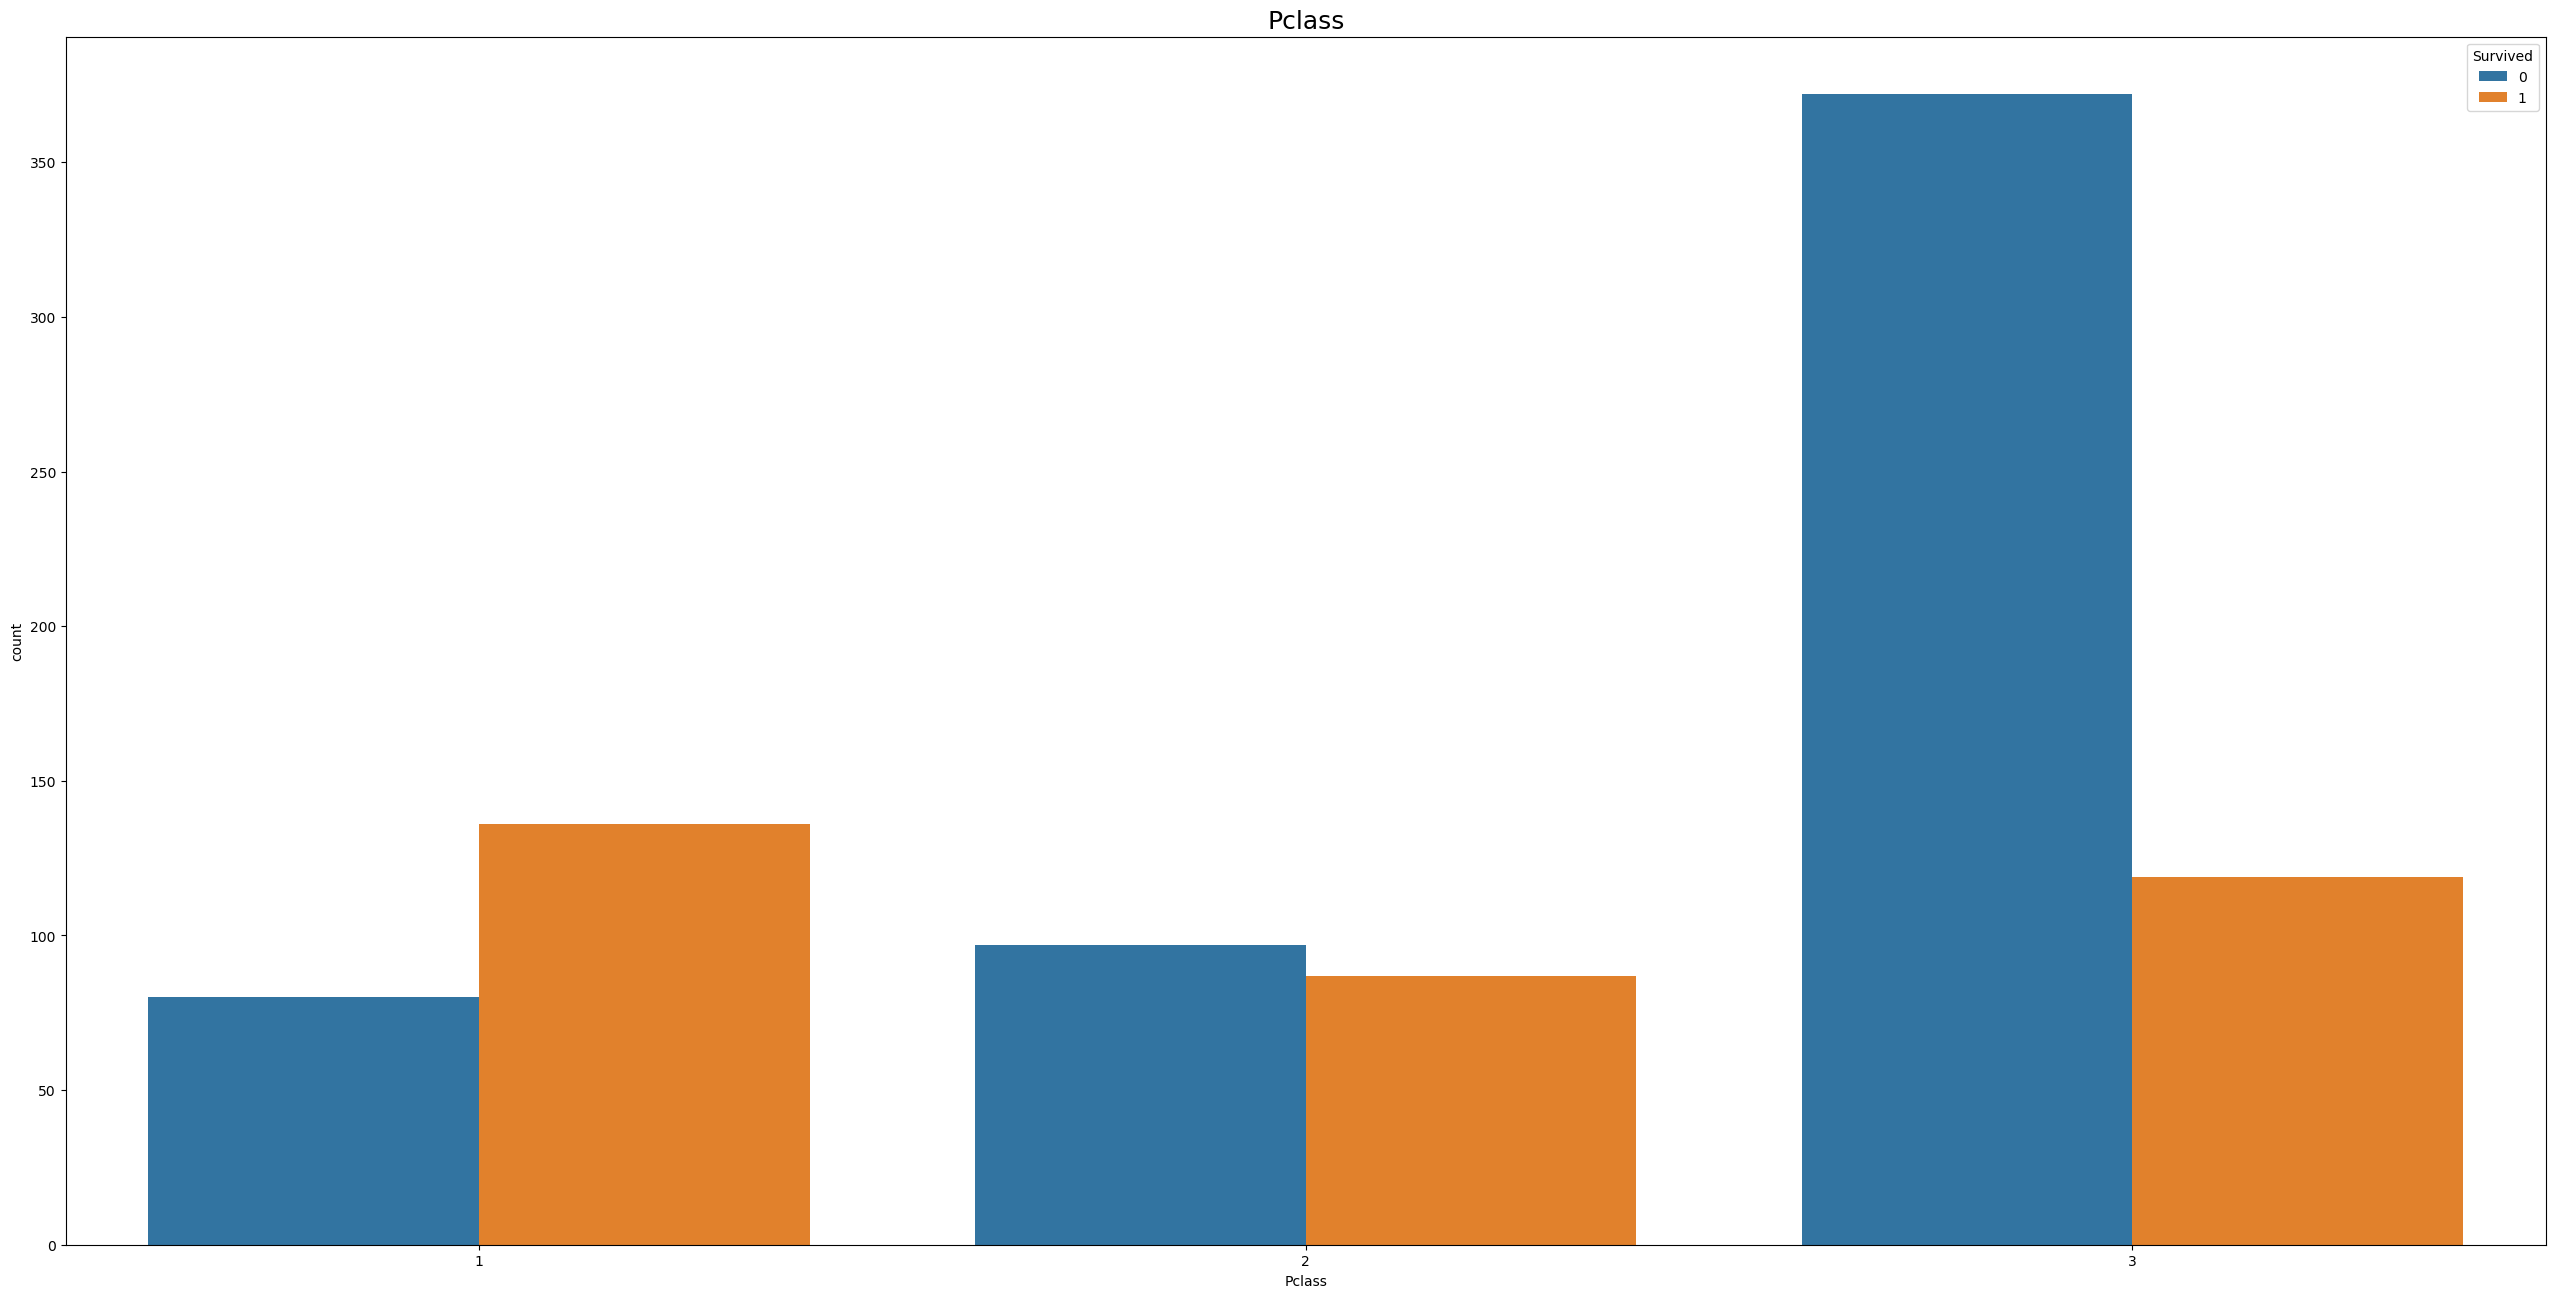

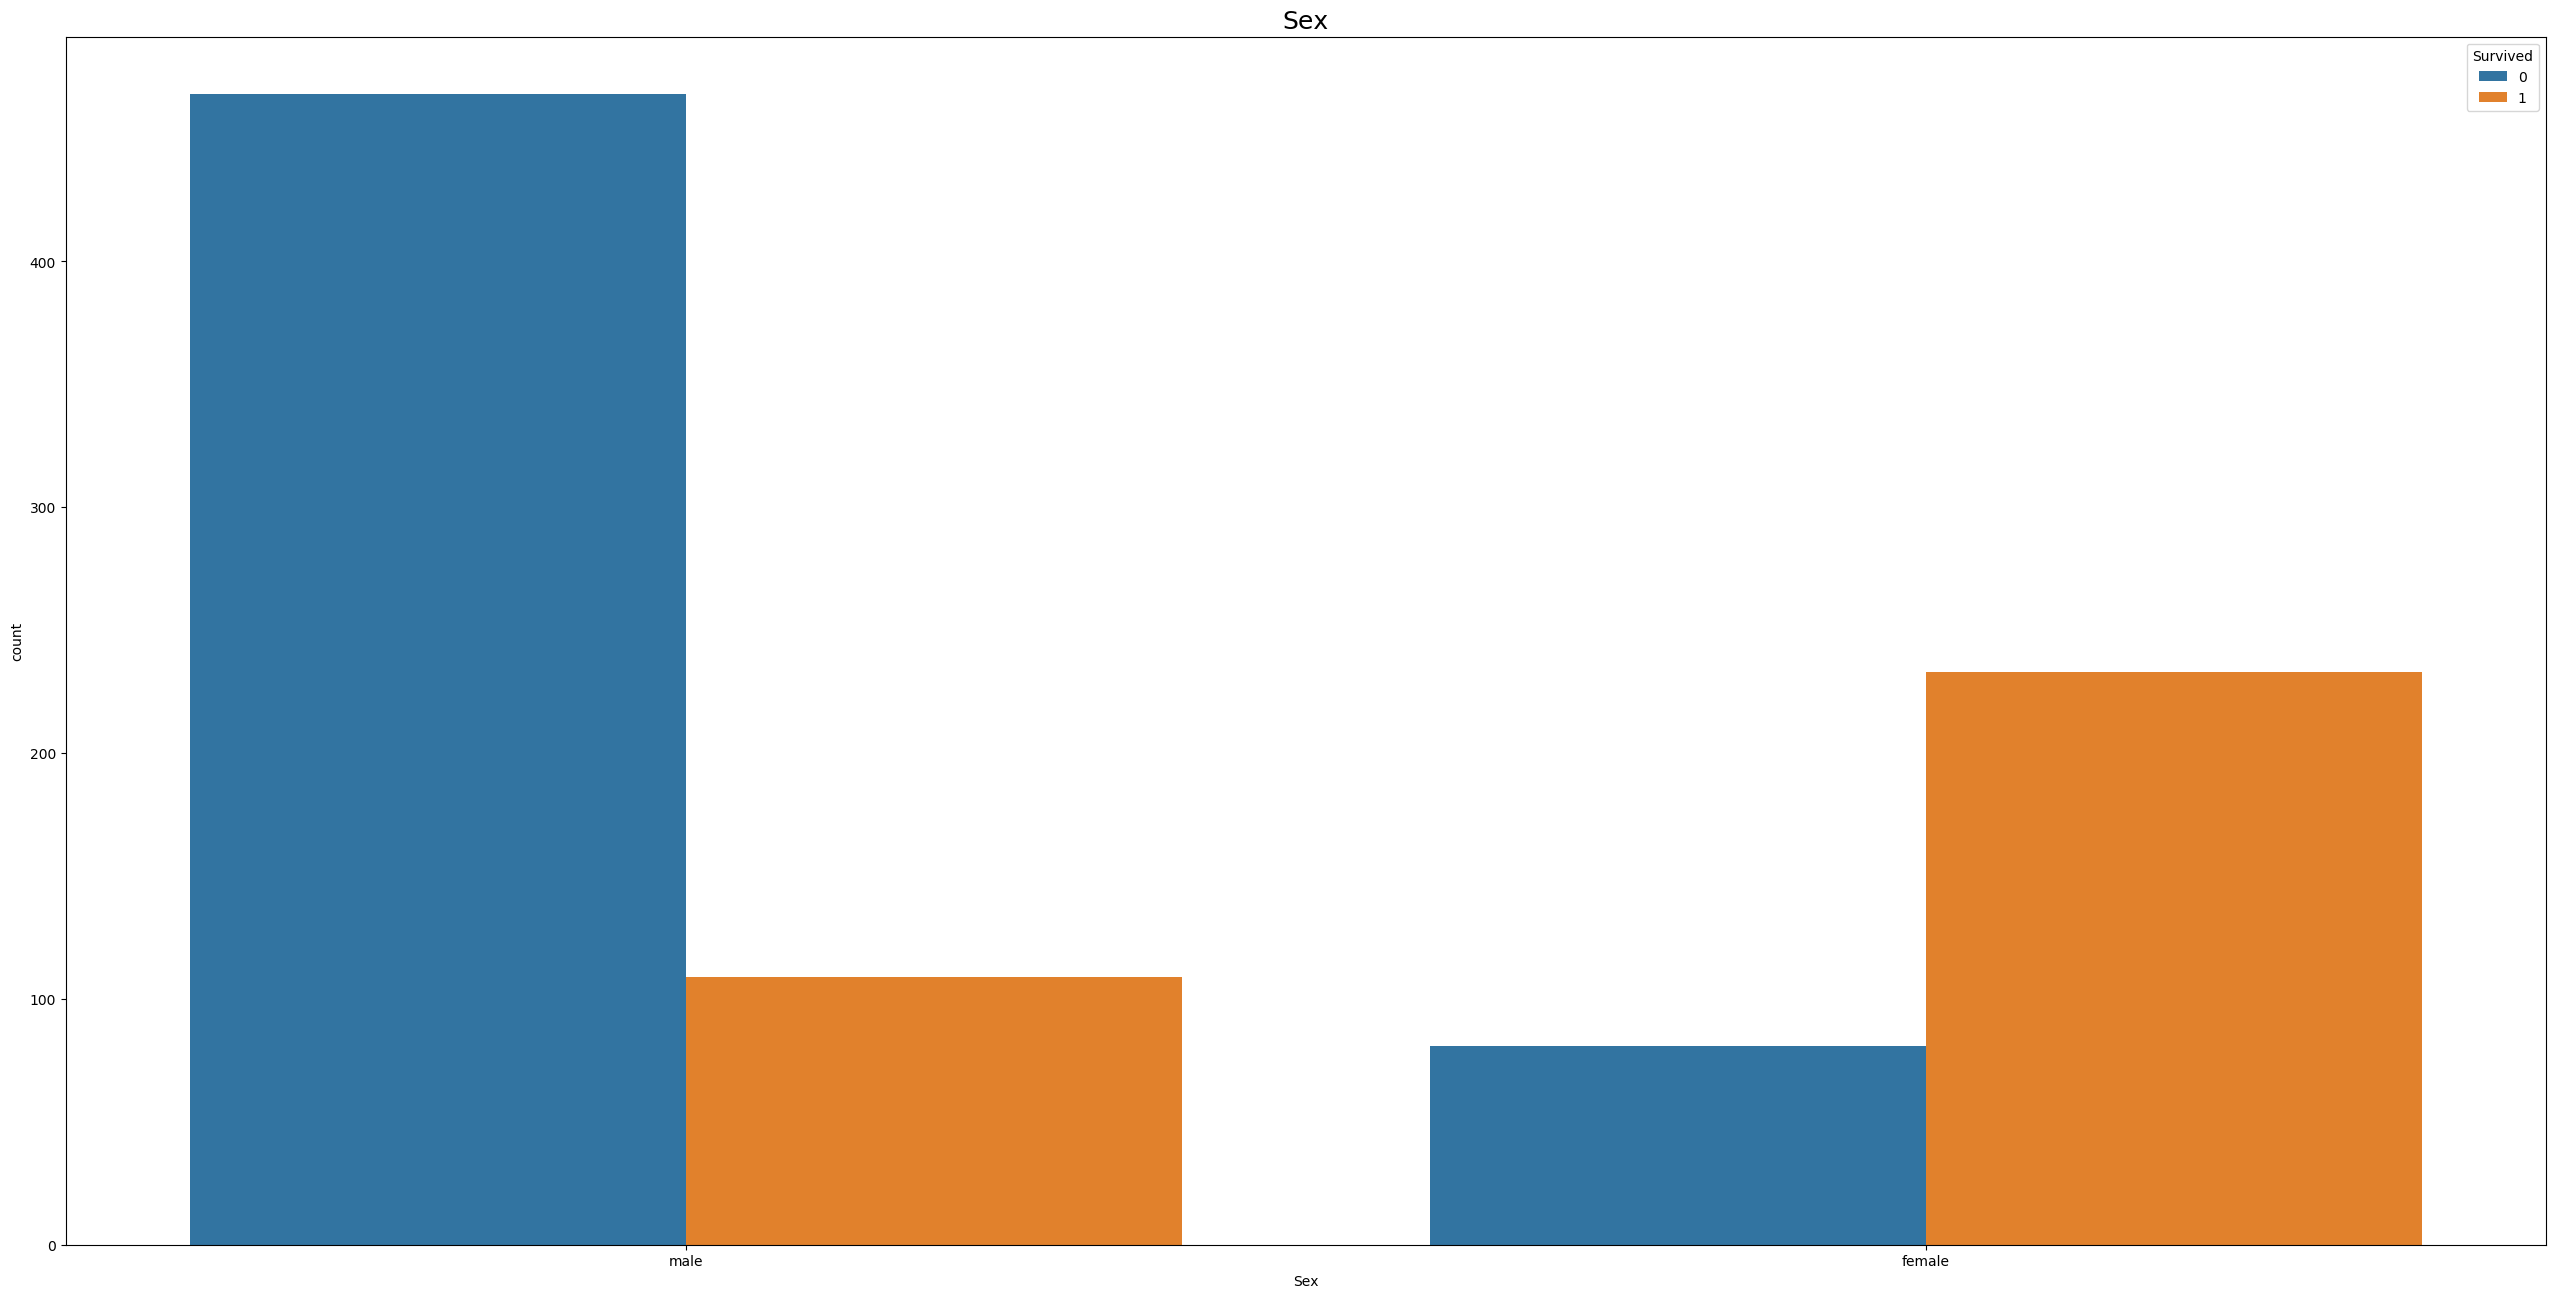

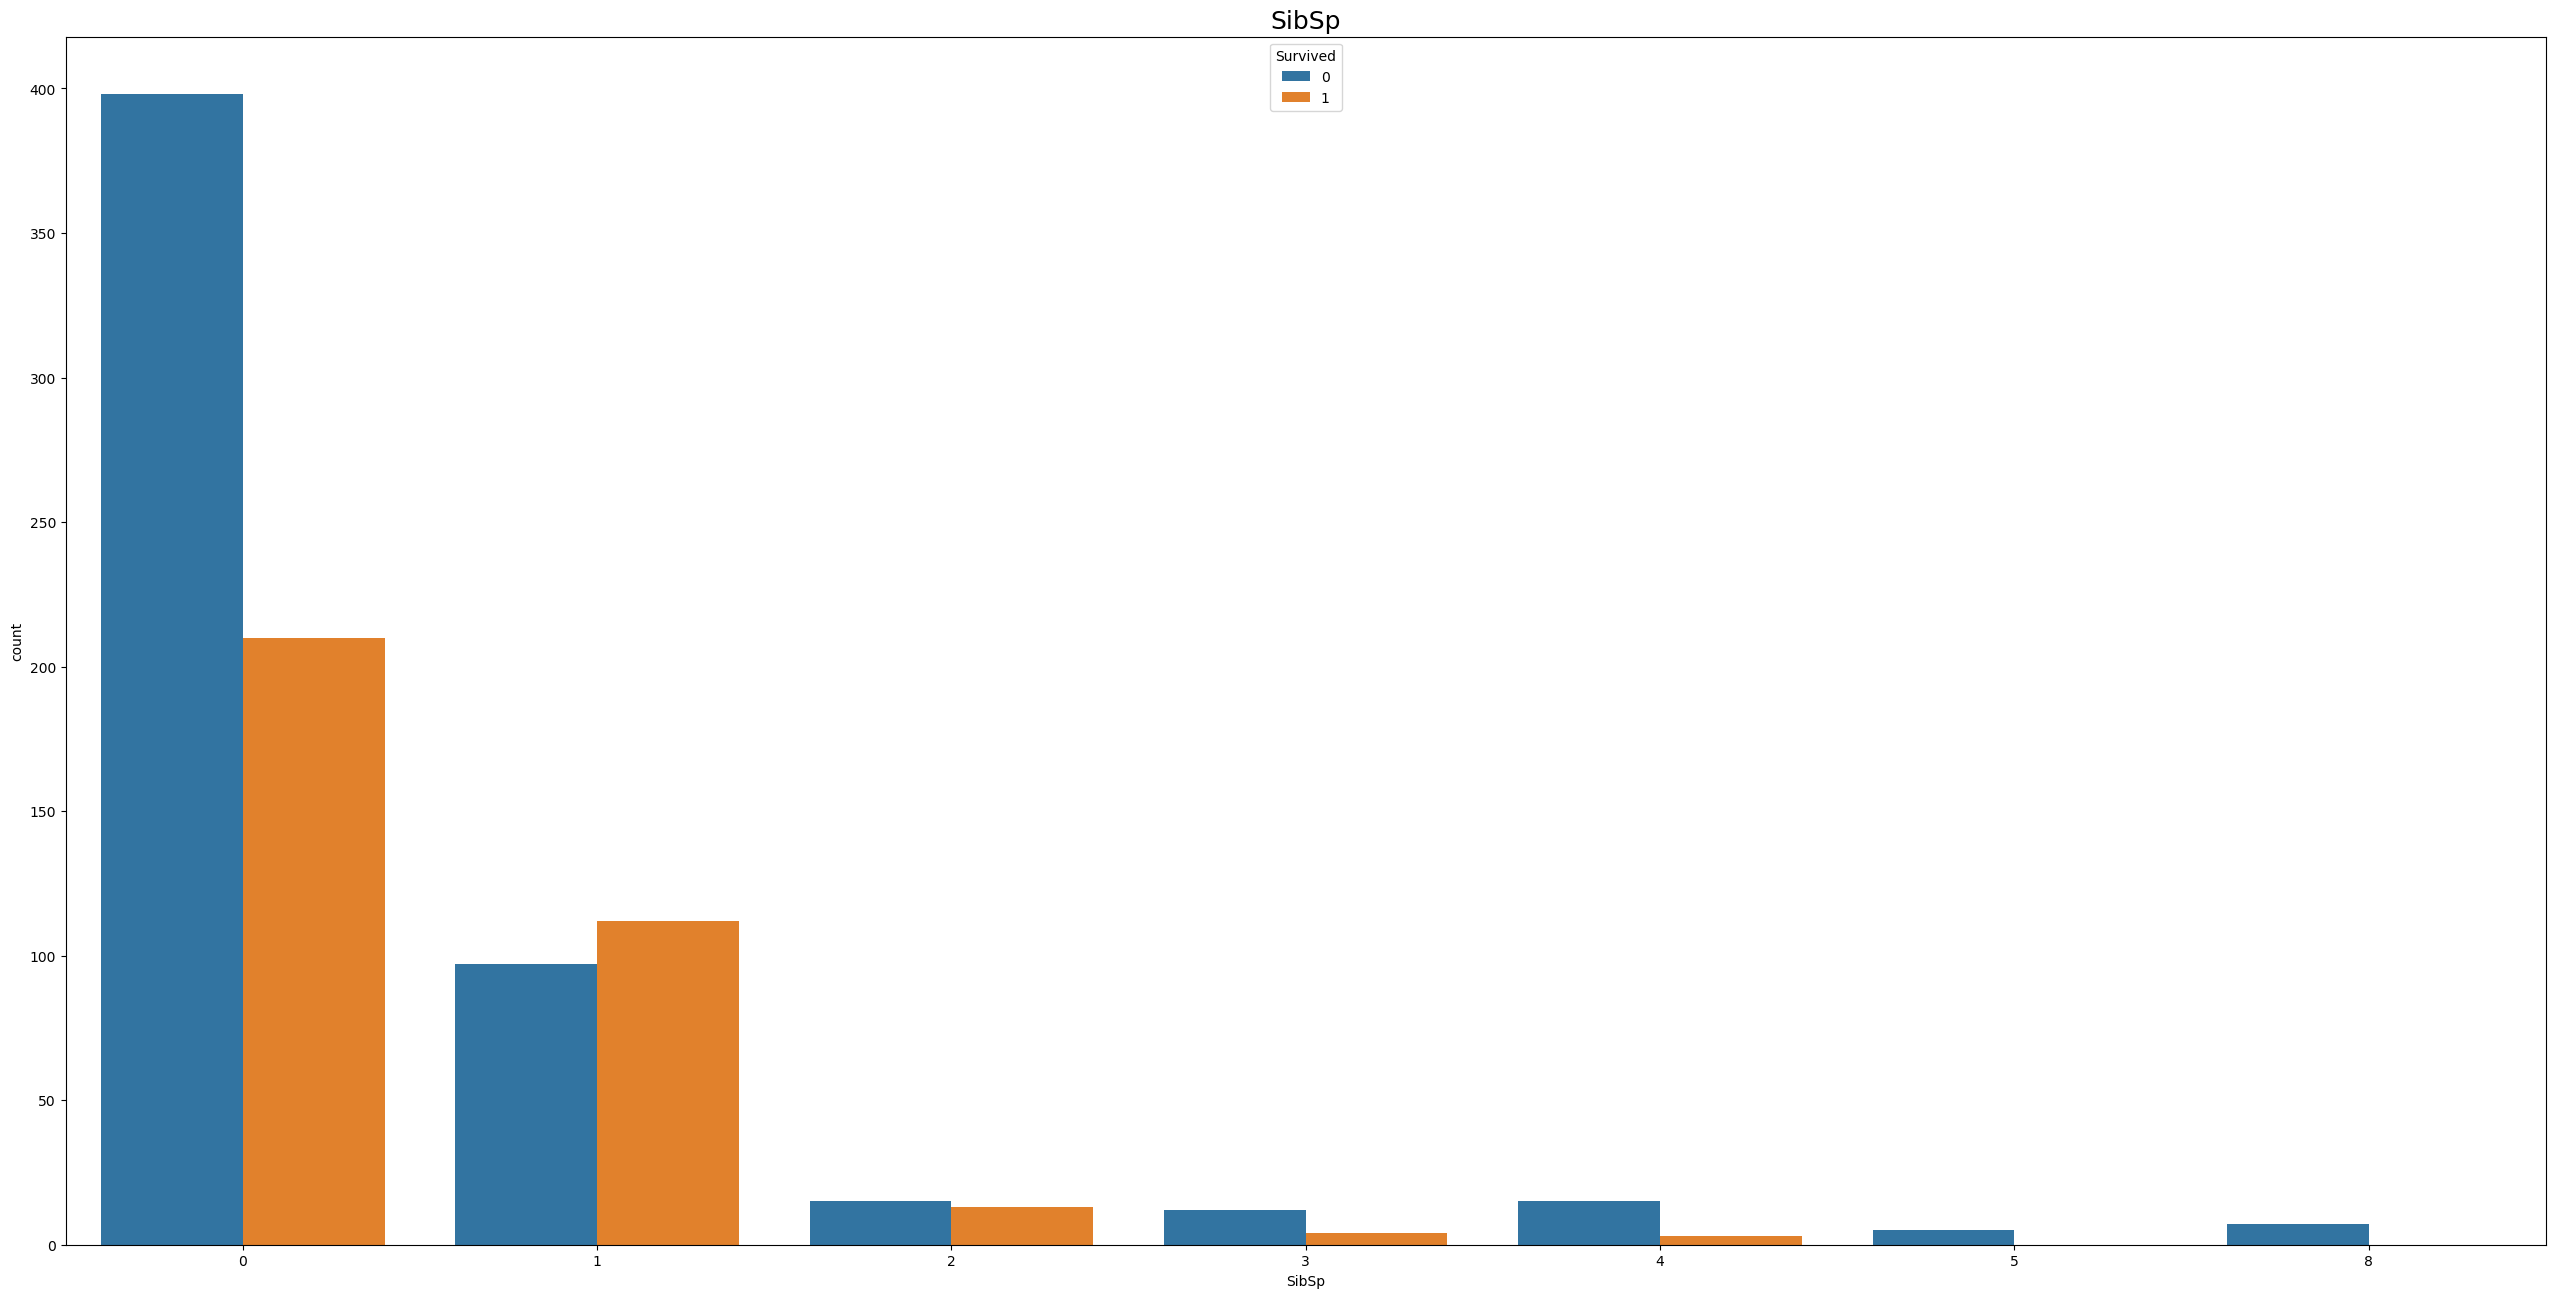

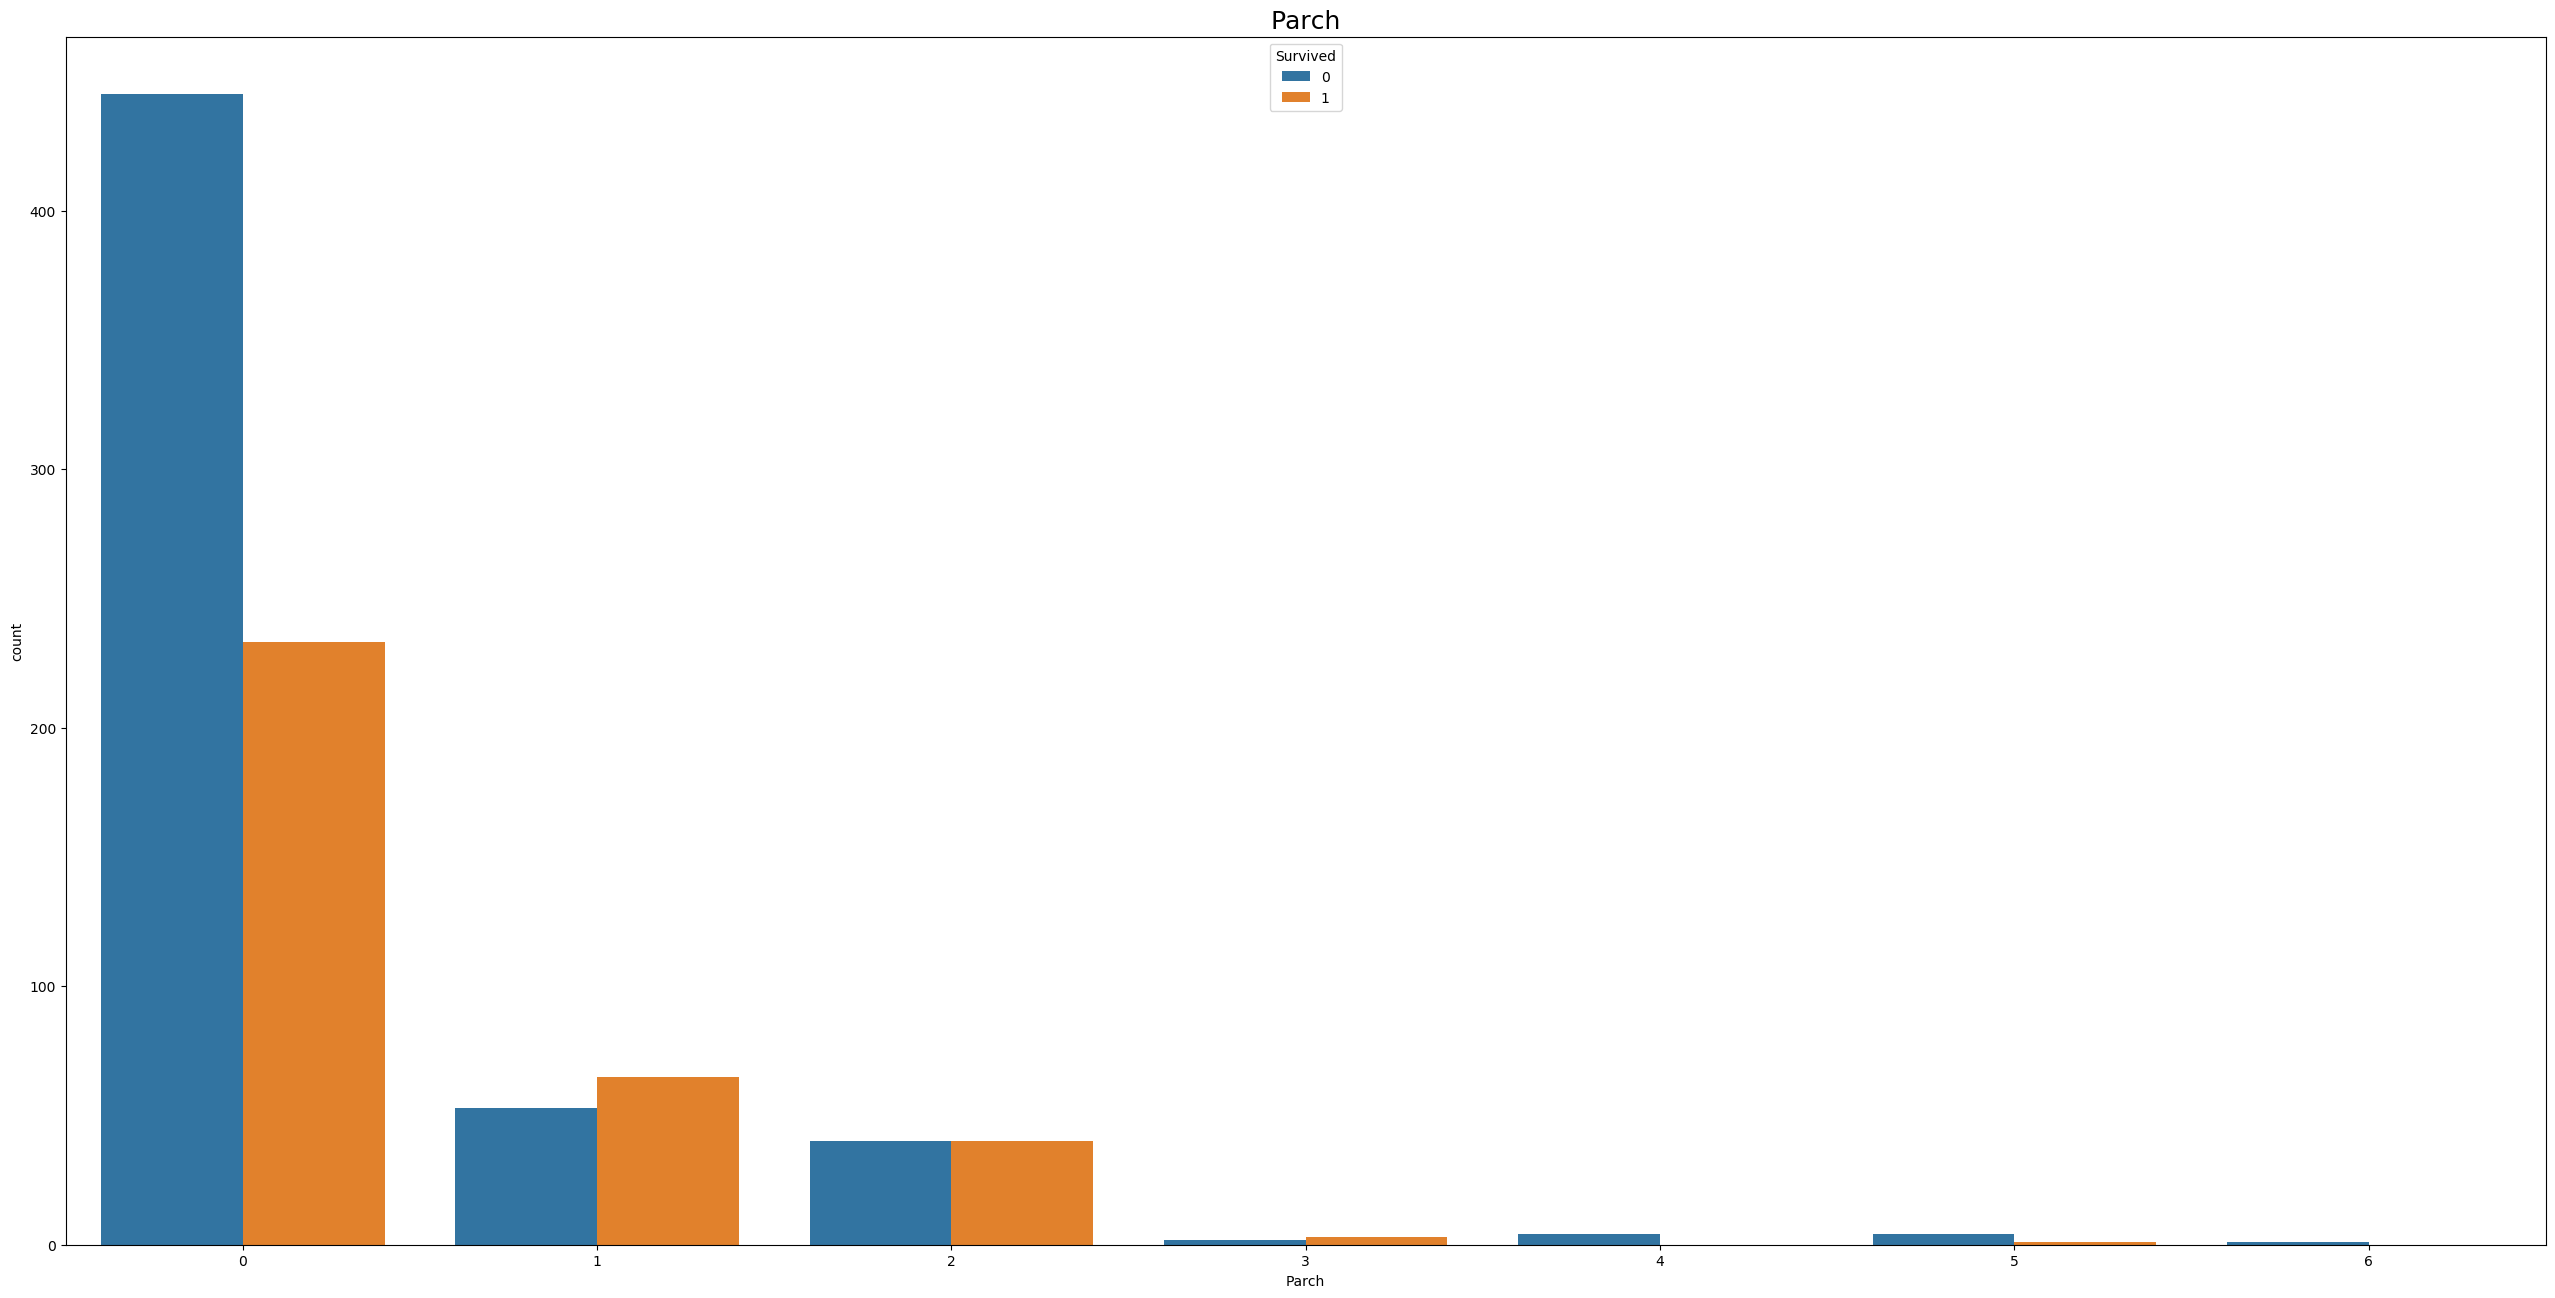

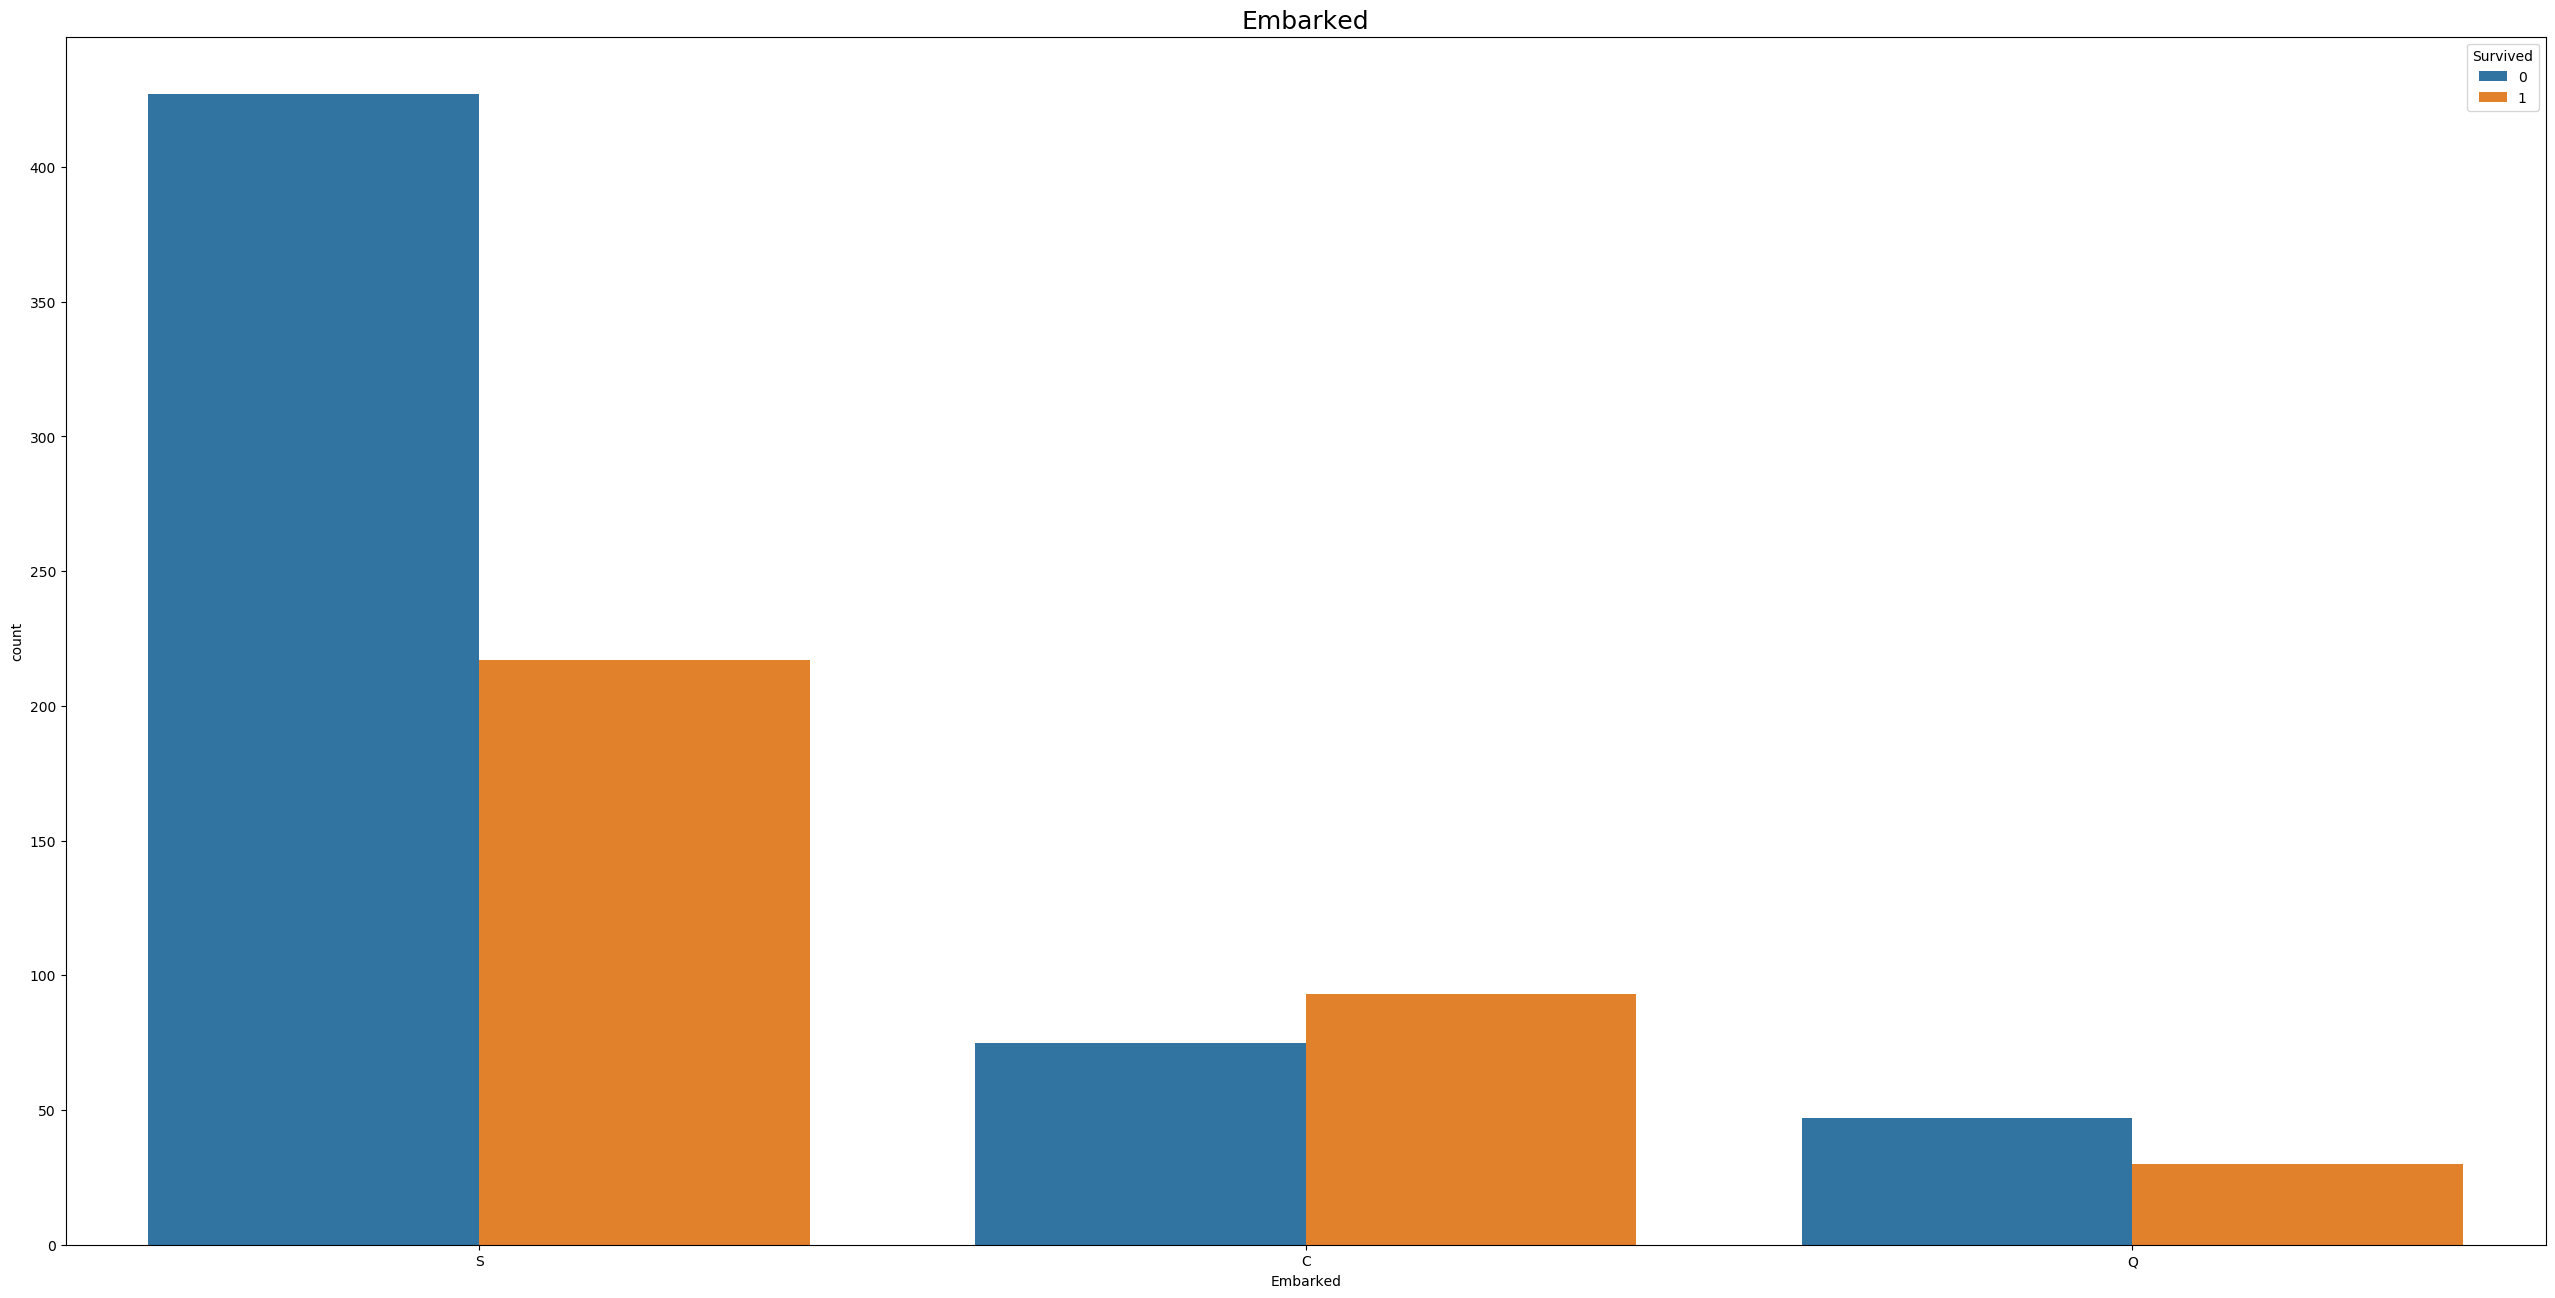

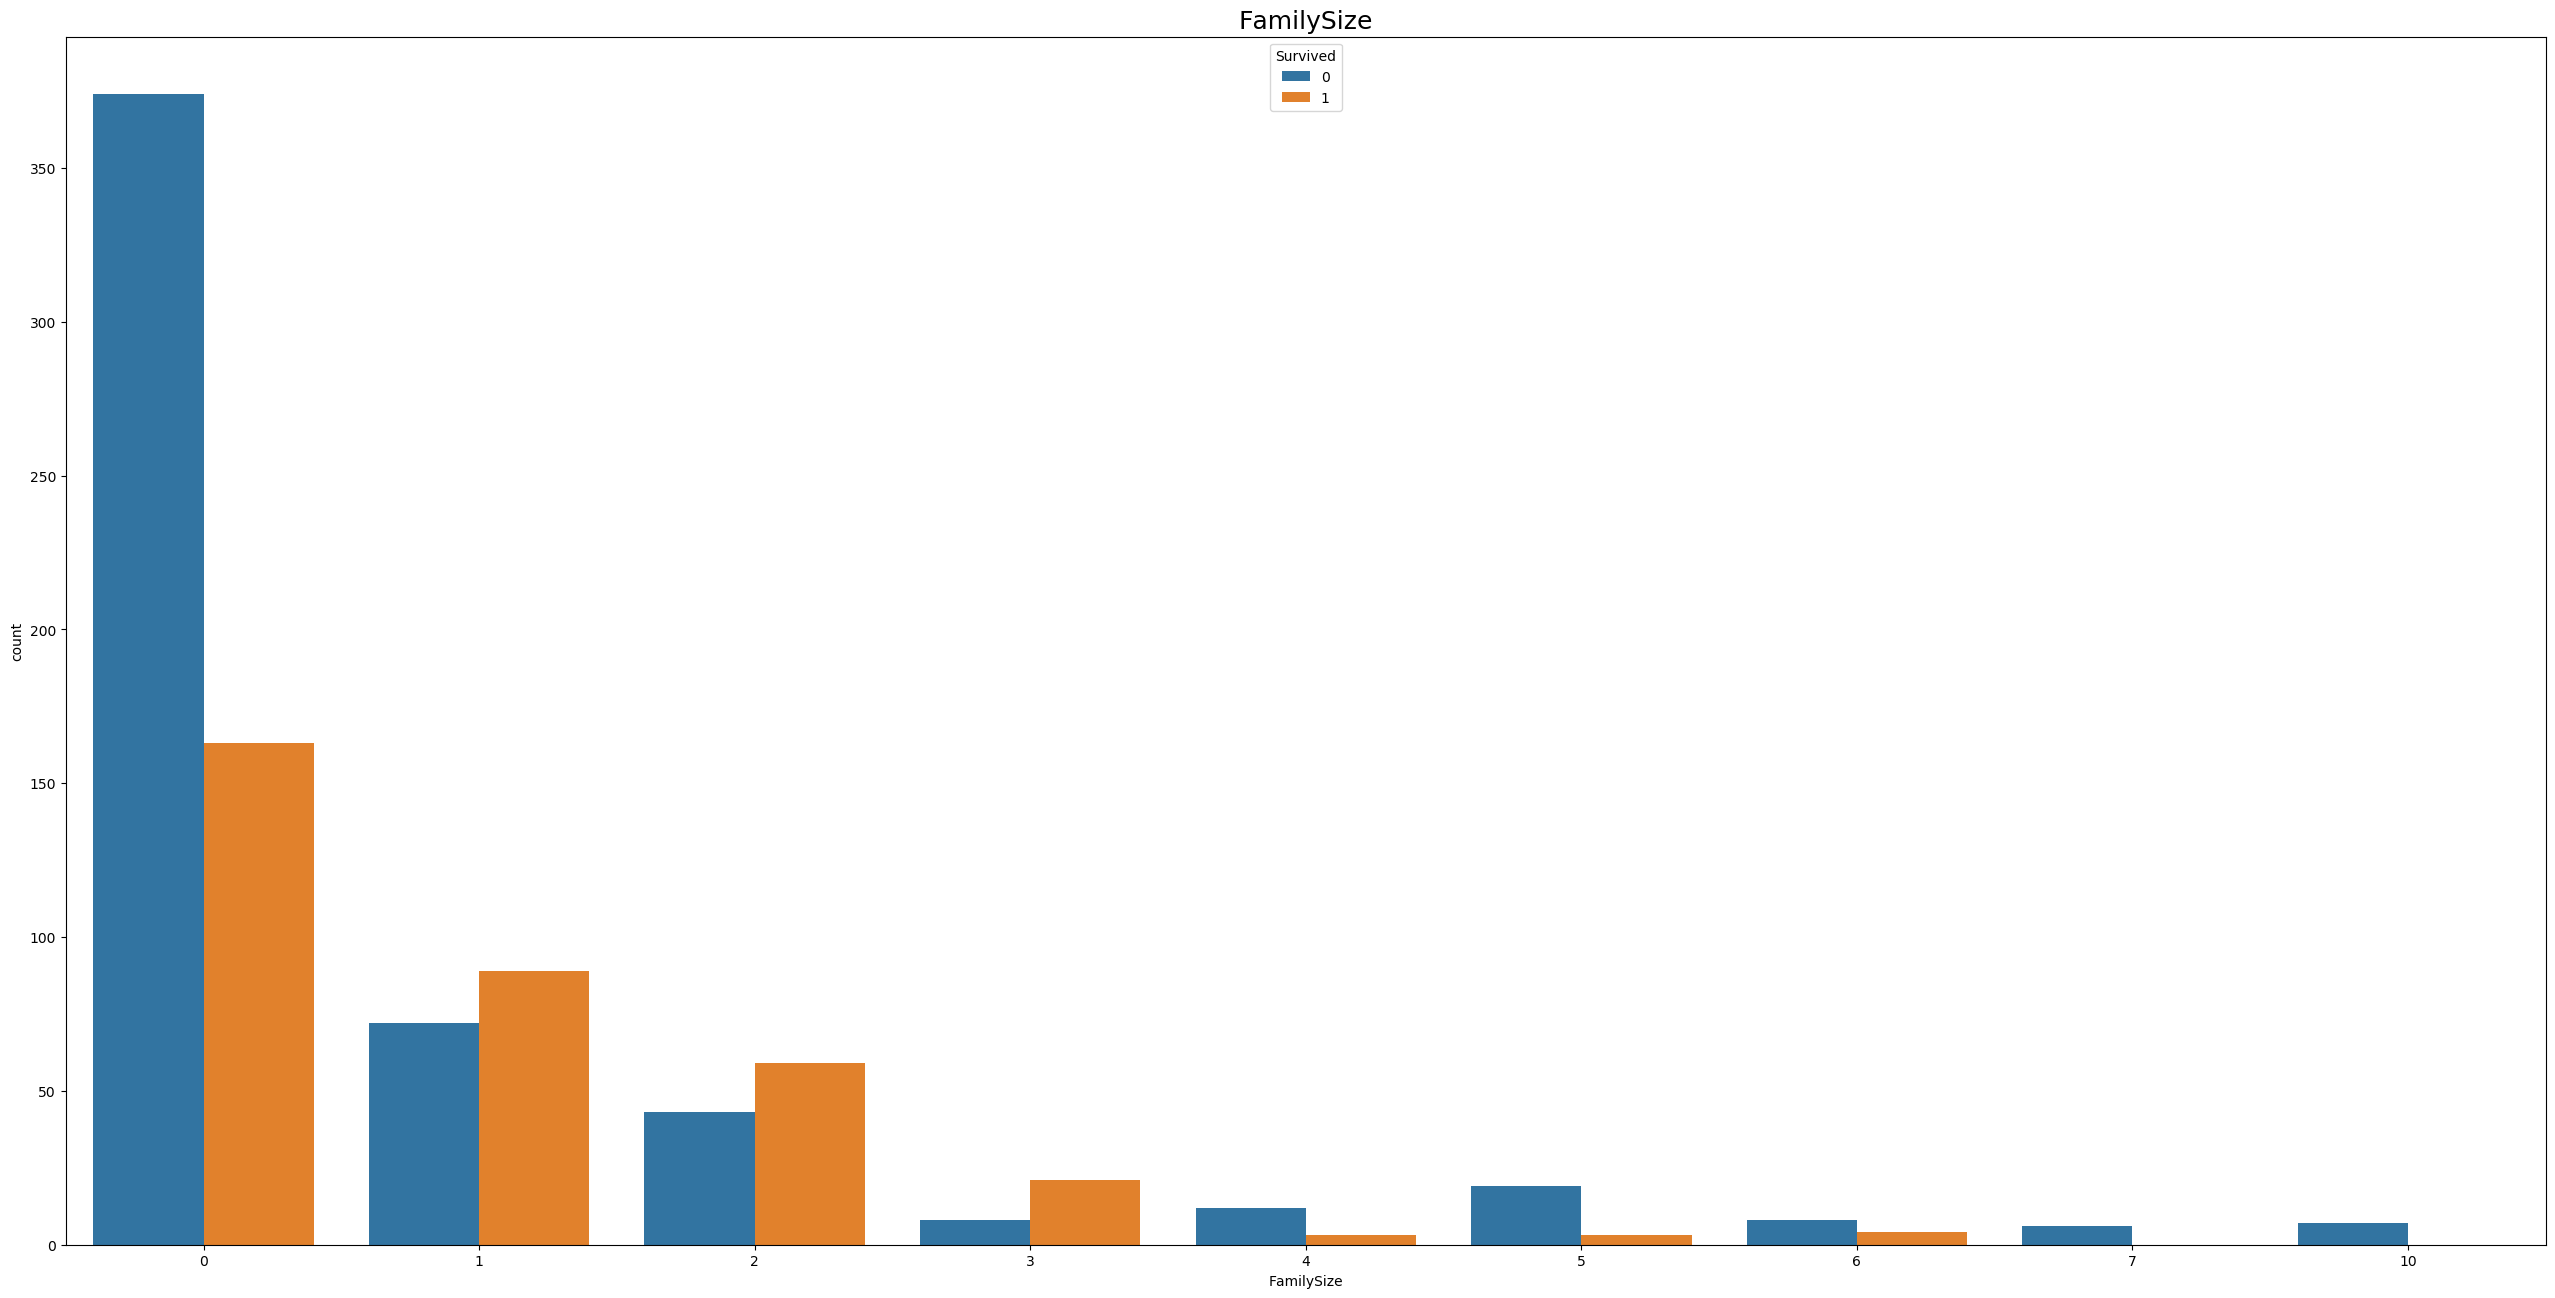

In [11]:
cols = ["CabinName", "Pclass", "Sex", "SibSp", "Parch", "Embarked", "FamilySize"]
for col in cols:
    plt.figure()
    plt.title(col, fontsize=18)
    sns.countplot(data=train_df, x=col, hue="Survived");

In [12]:
cols = ["CabinName", "Pclass", "Sex", "SibSp", "Parch", "Embarked", "FamilySize"]
for col in cols:
    x = train_df[["Survived", col]].groupby(col, as_index=False).mean().sort_values(by="Survived", ascending=False)
    print(x)
    print("*"*100)

  CabinName  Survived
3         D  0.757576
4         E  0.750000
1         B  0.744681
5         F  0.615385
2         C  0.593220
6         G  0.500000
0         A  0.466667
7      NONE  0.299854
8         T  0.000000
****************************************************************************************************
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
****************************************************************************************************
      Sex  Survived
0  female  0.742038
1    male  0.188908
****************************************************************************************************
   SibSp  Survived
1      1  0.535885
2      2  0.464286
0      0  0.345395
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000
****************************************************************************************************
   Parch  Survived
3      3  0.600000
1      1  0.550847
2      2  0.500000
0      0

/Users/tomfujii/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/tomfujii/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/tomfujii/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
/Users/tomfujii/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional inde

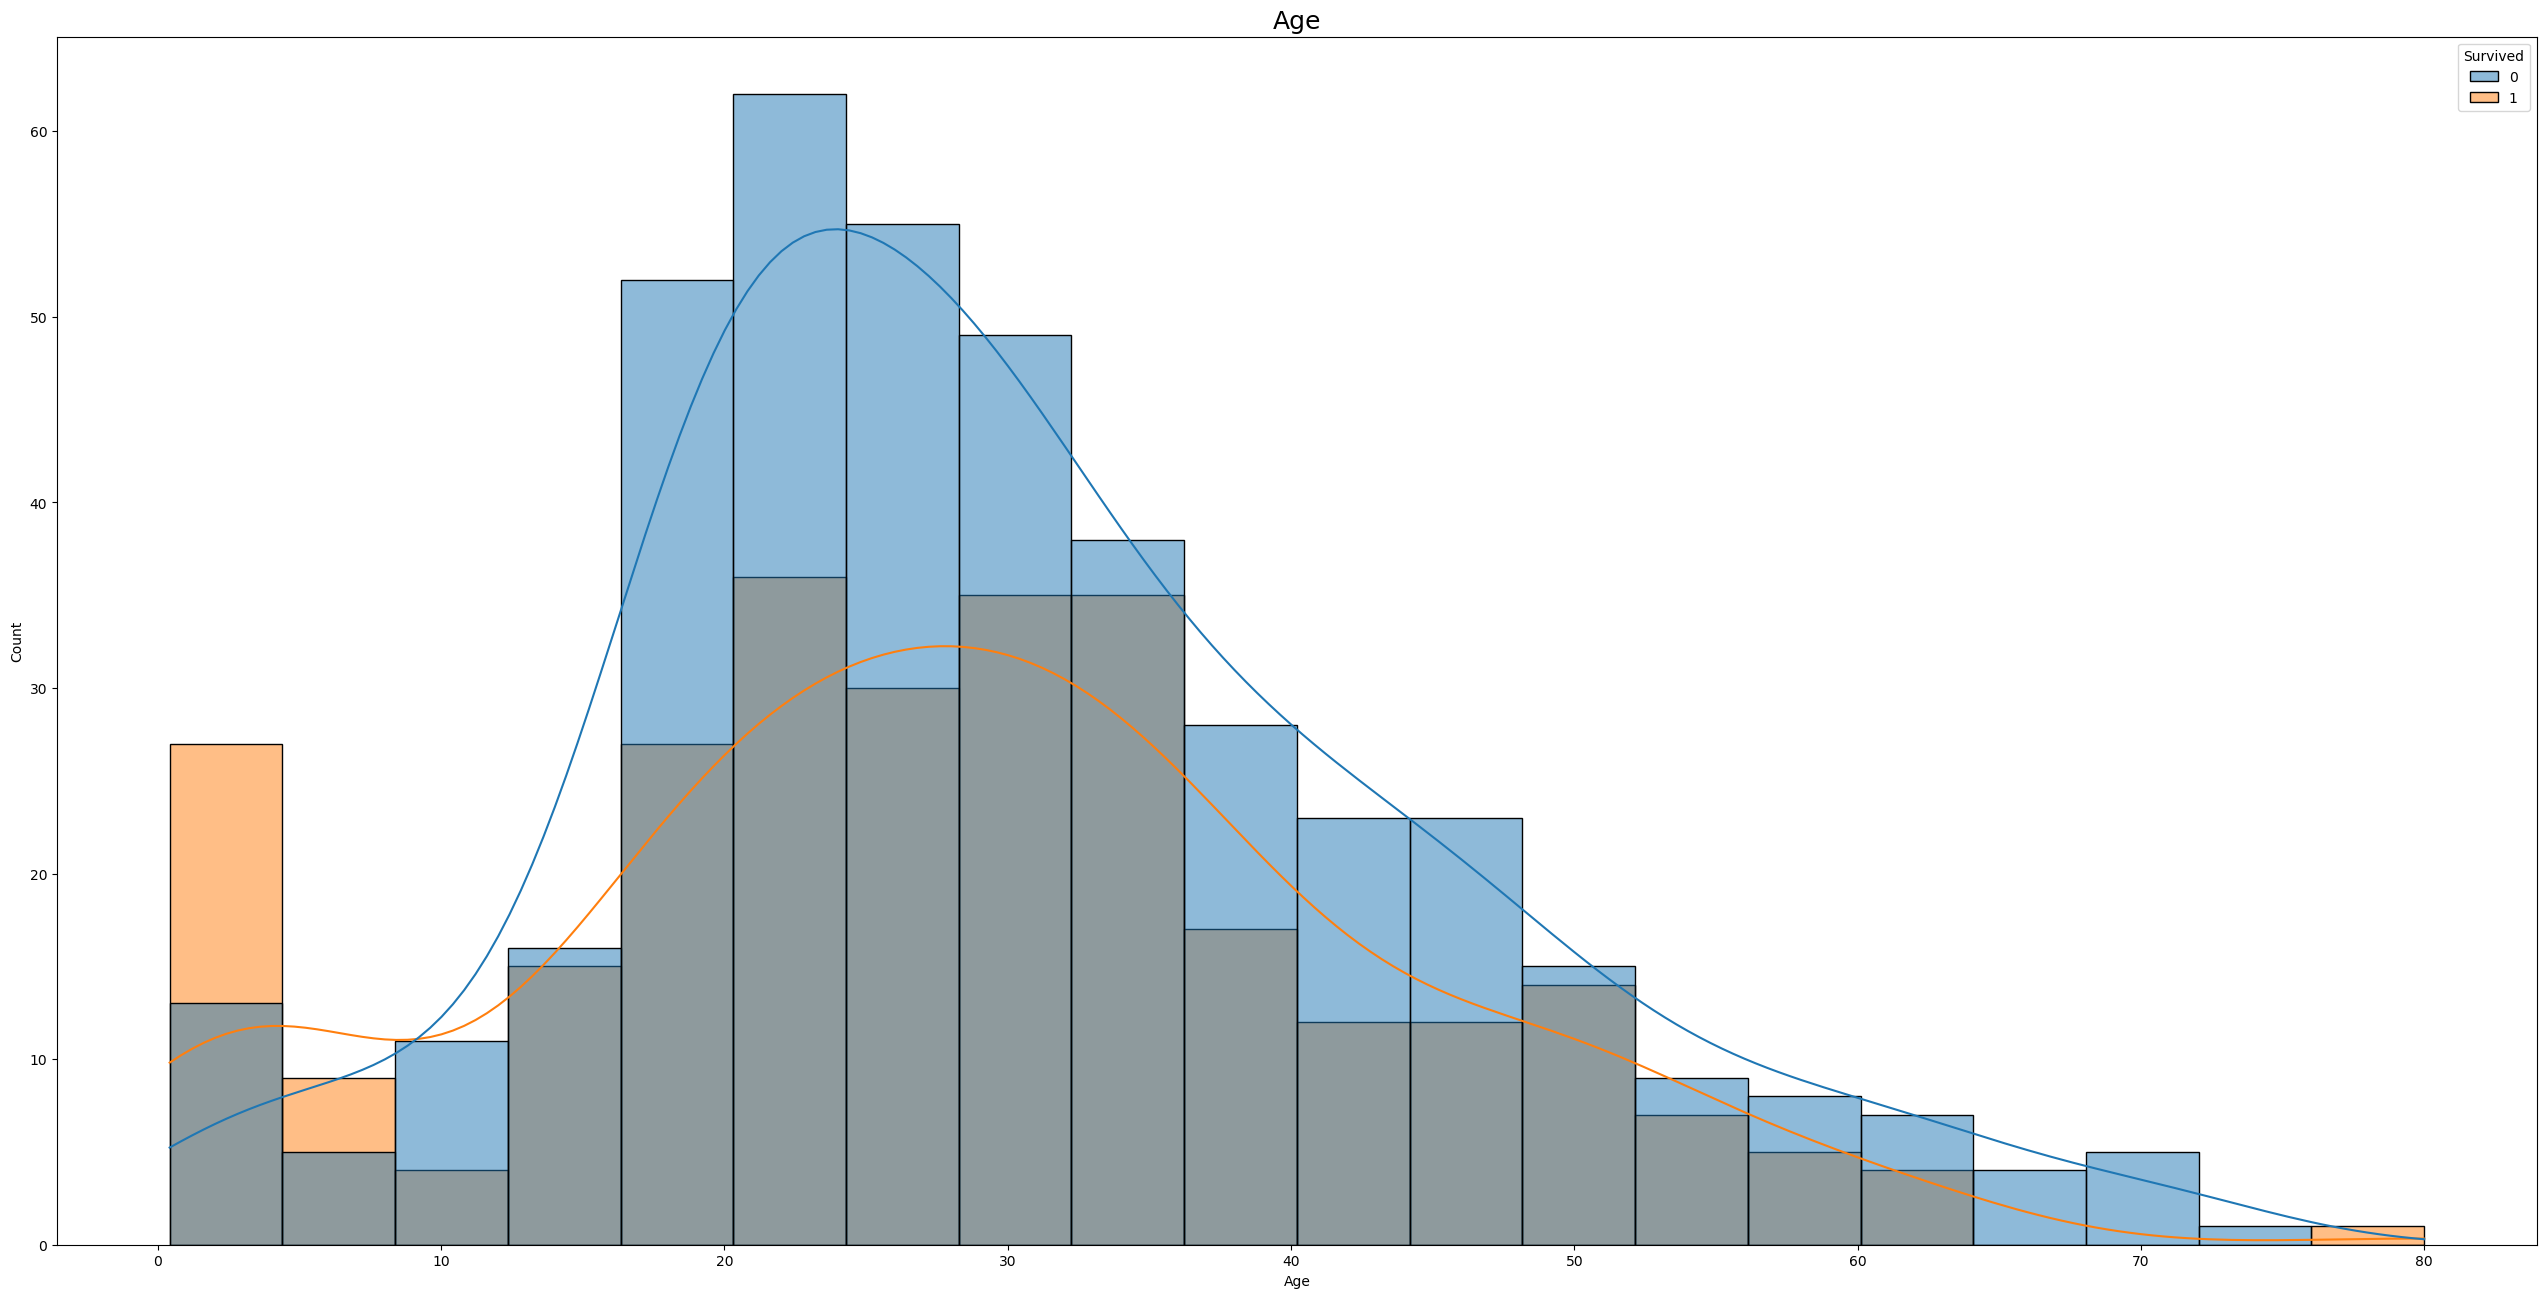

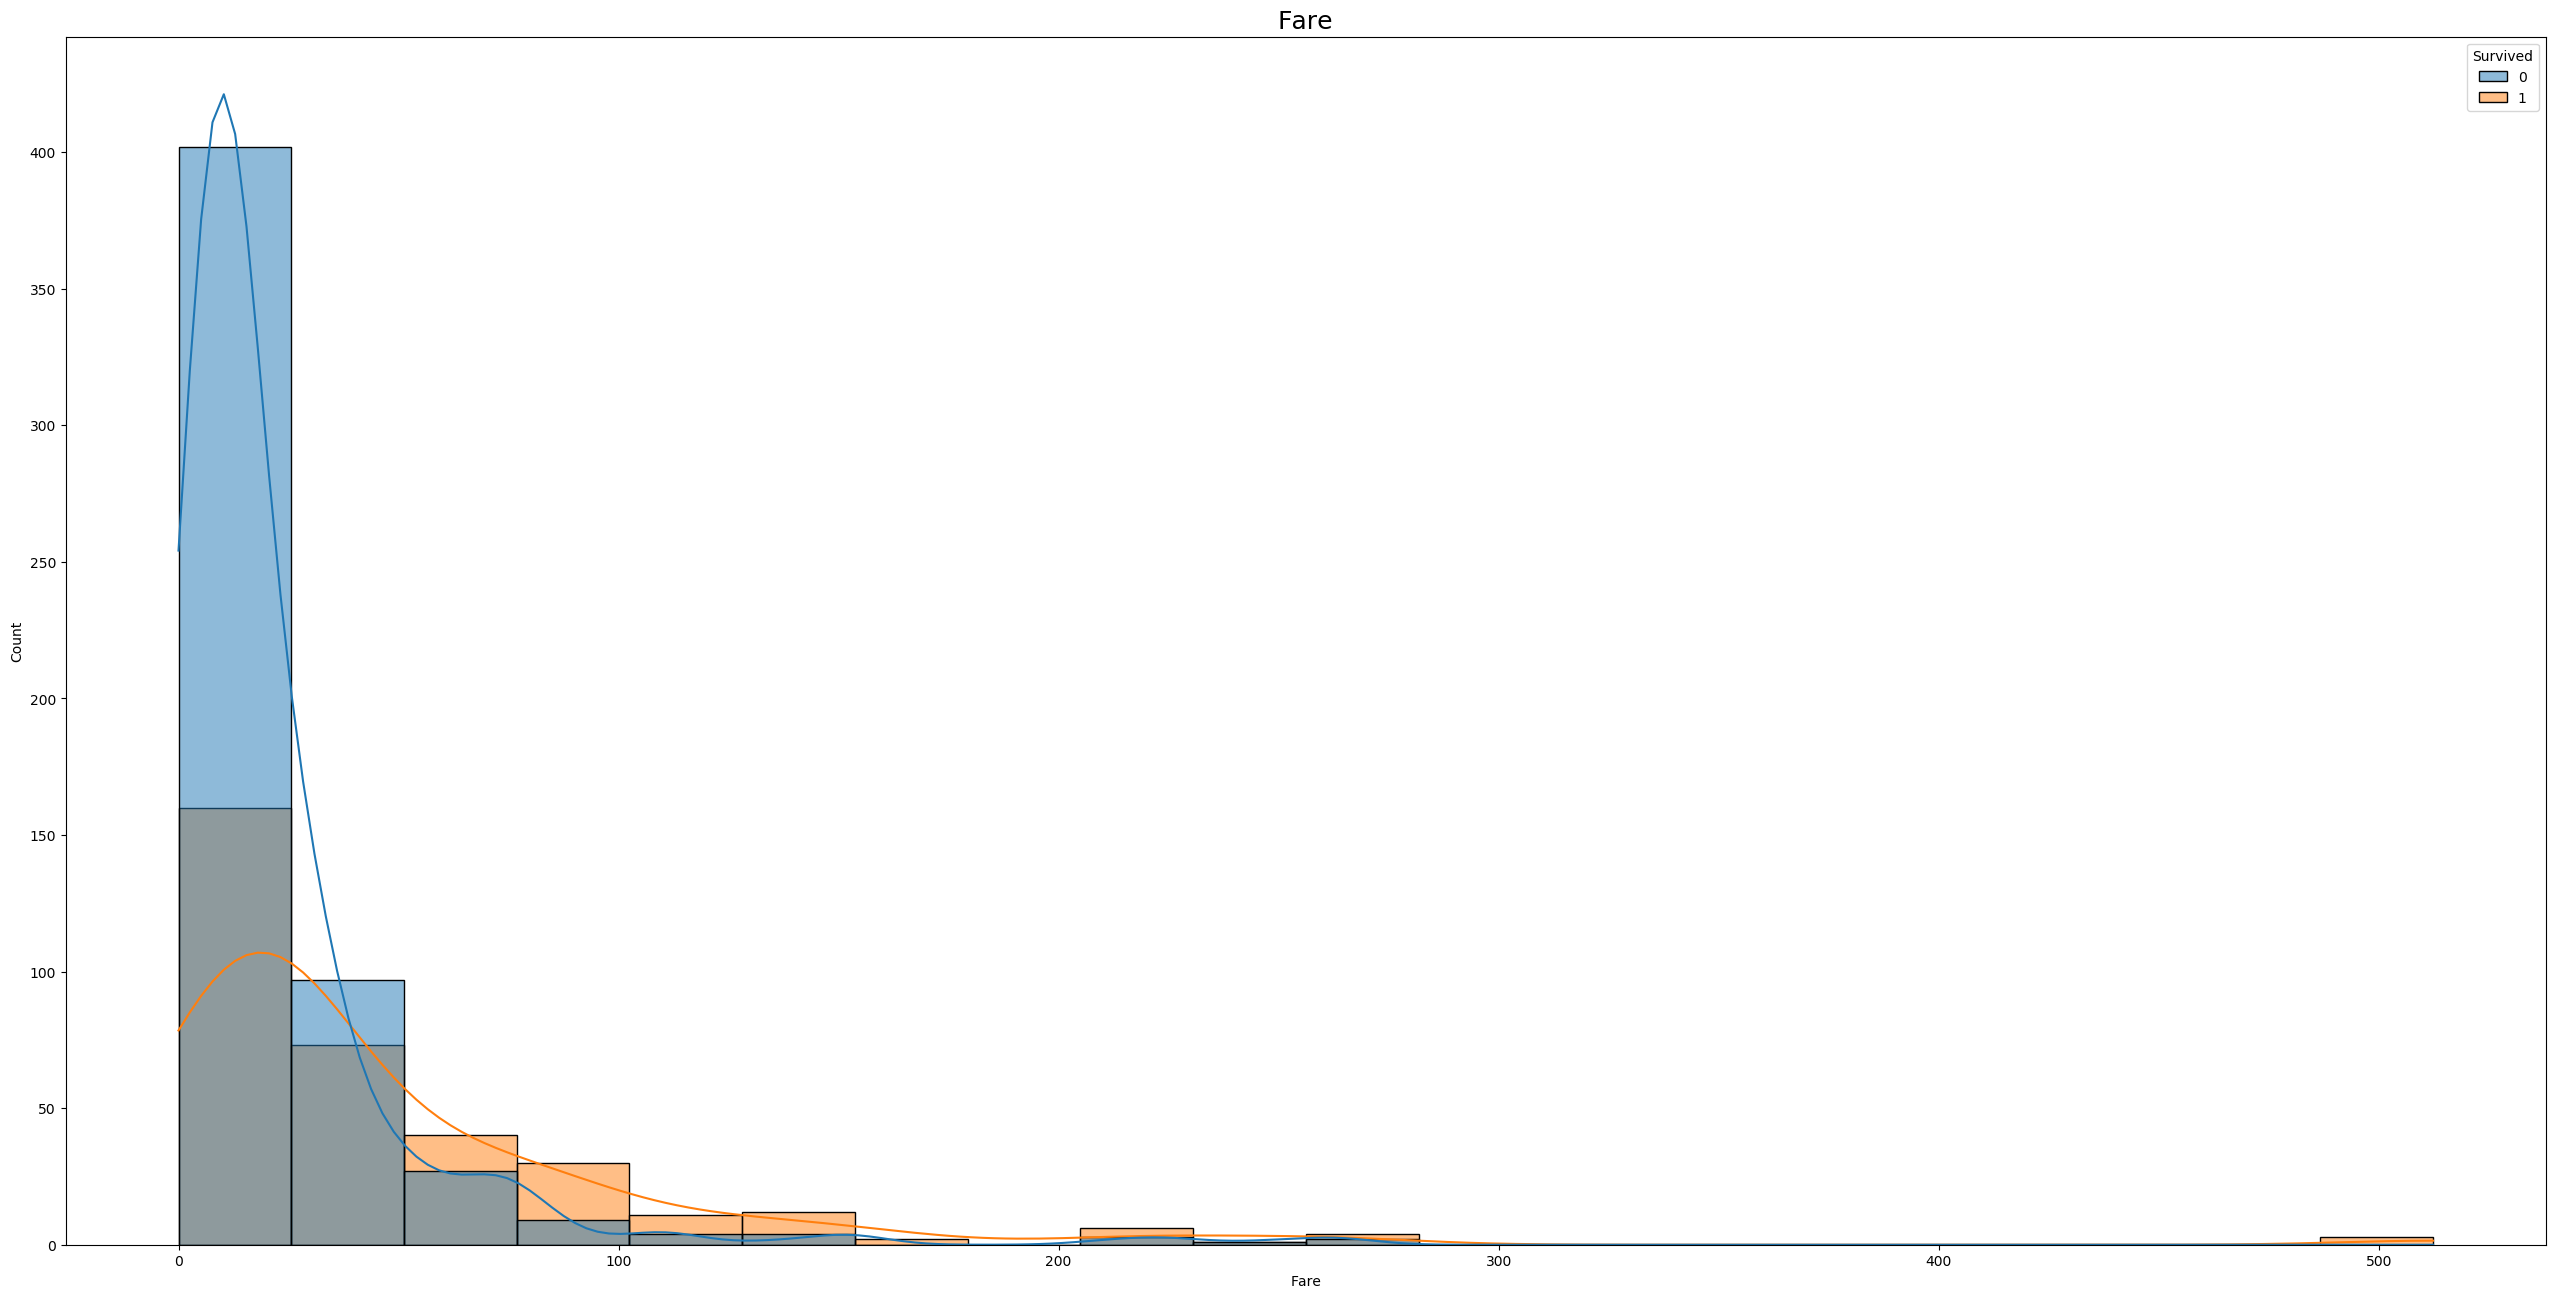

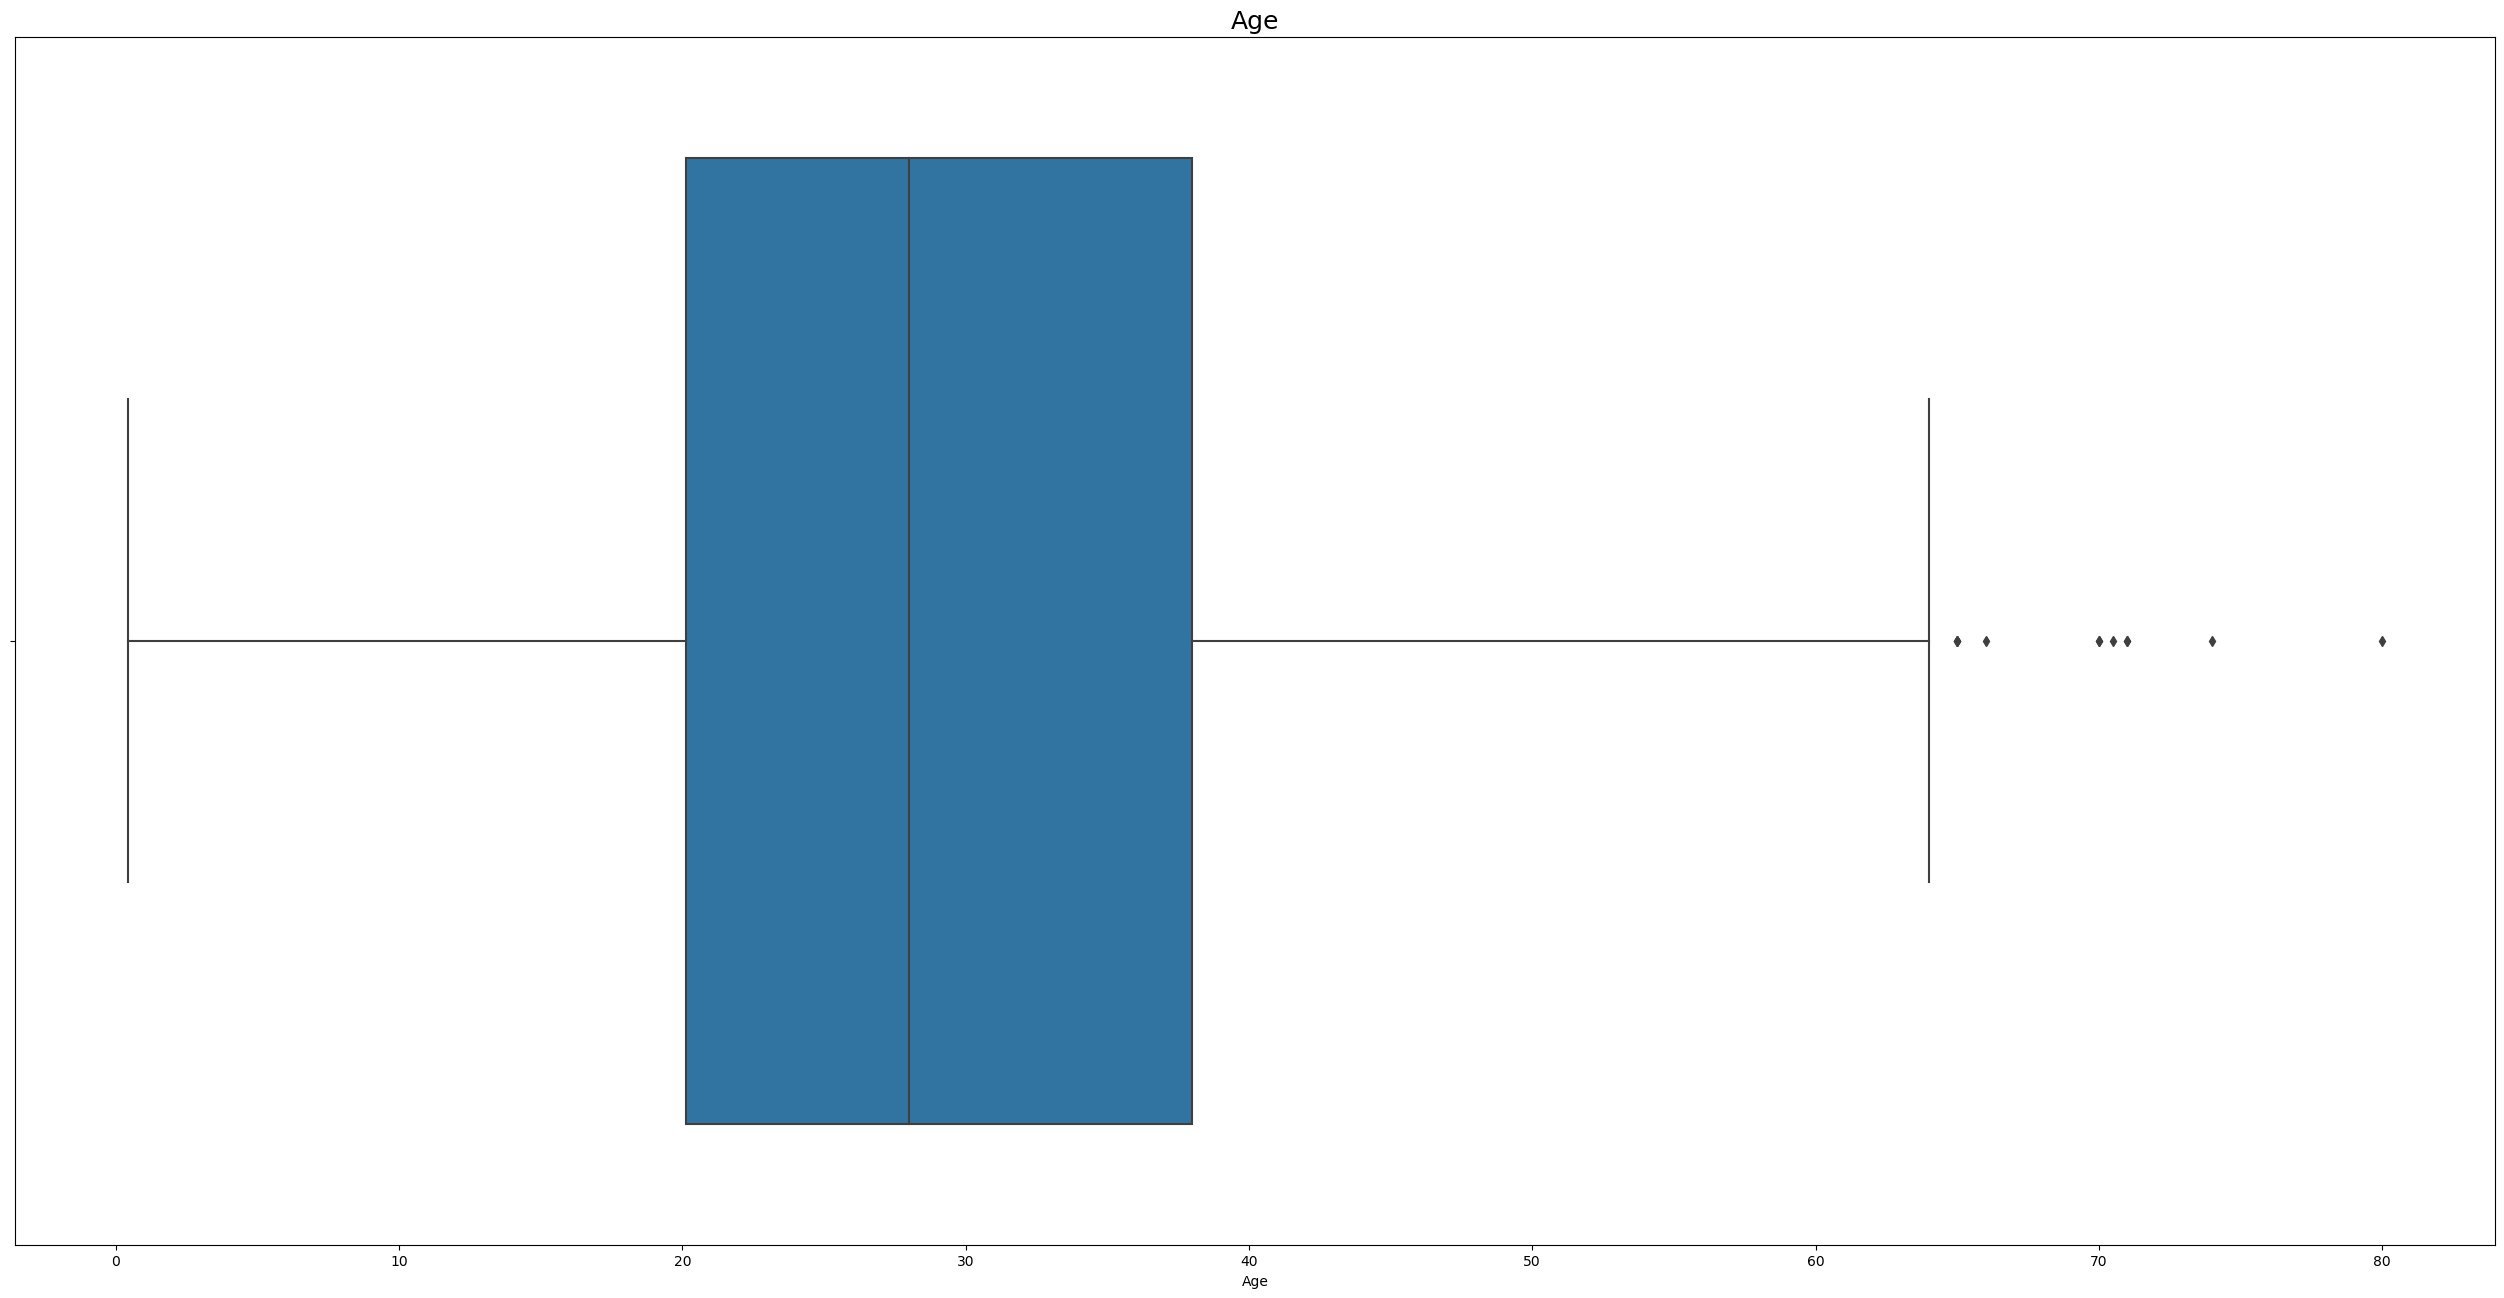

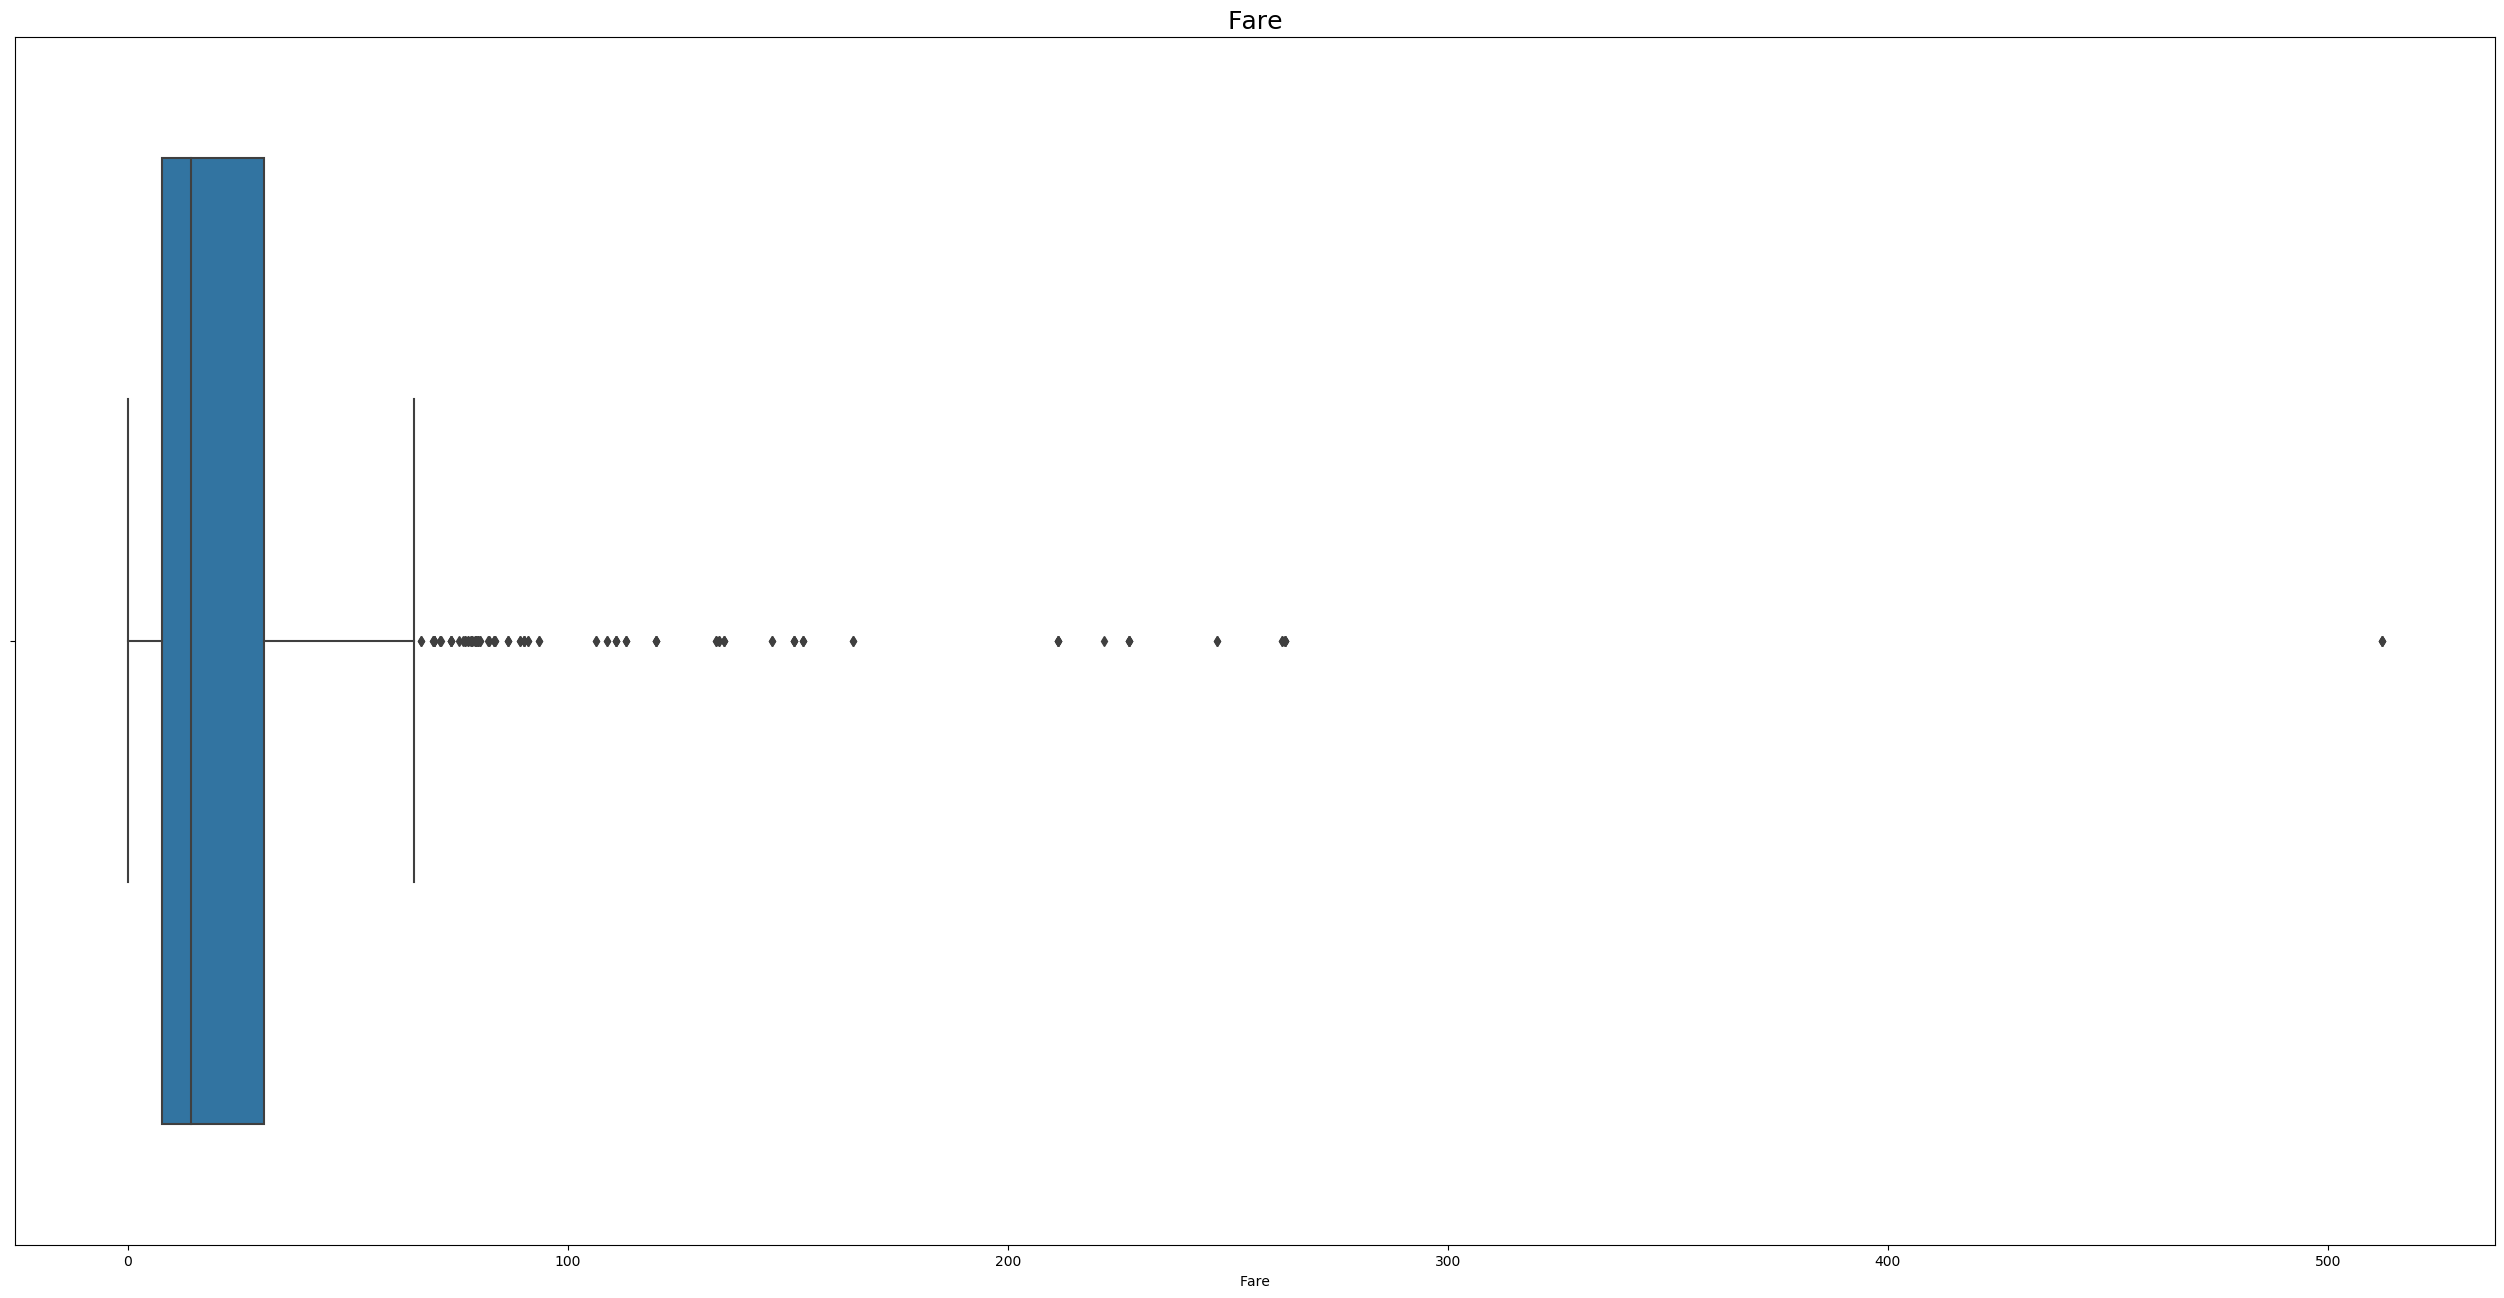

In [13]:
cols = ["Age", "Fare"]
for col in cols:
    plt.figure()
    plt.title(col, fontsize=18)
    sns.histplot(data=train_df, x=col, hue="Survived", kde=True, bins=20);
    
    
for col in cols:
    plt.figure()
    plt.title(col, fontsize=18)
    sns.boxplot(data=train_df, x=col, hue="Survived");

# Feature Engineering

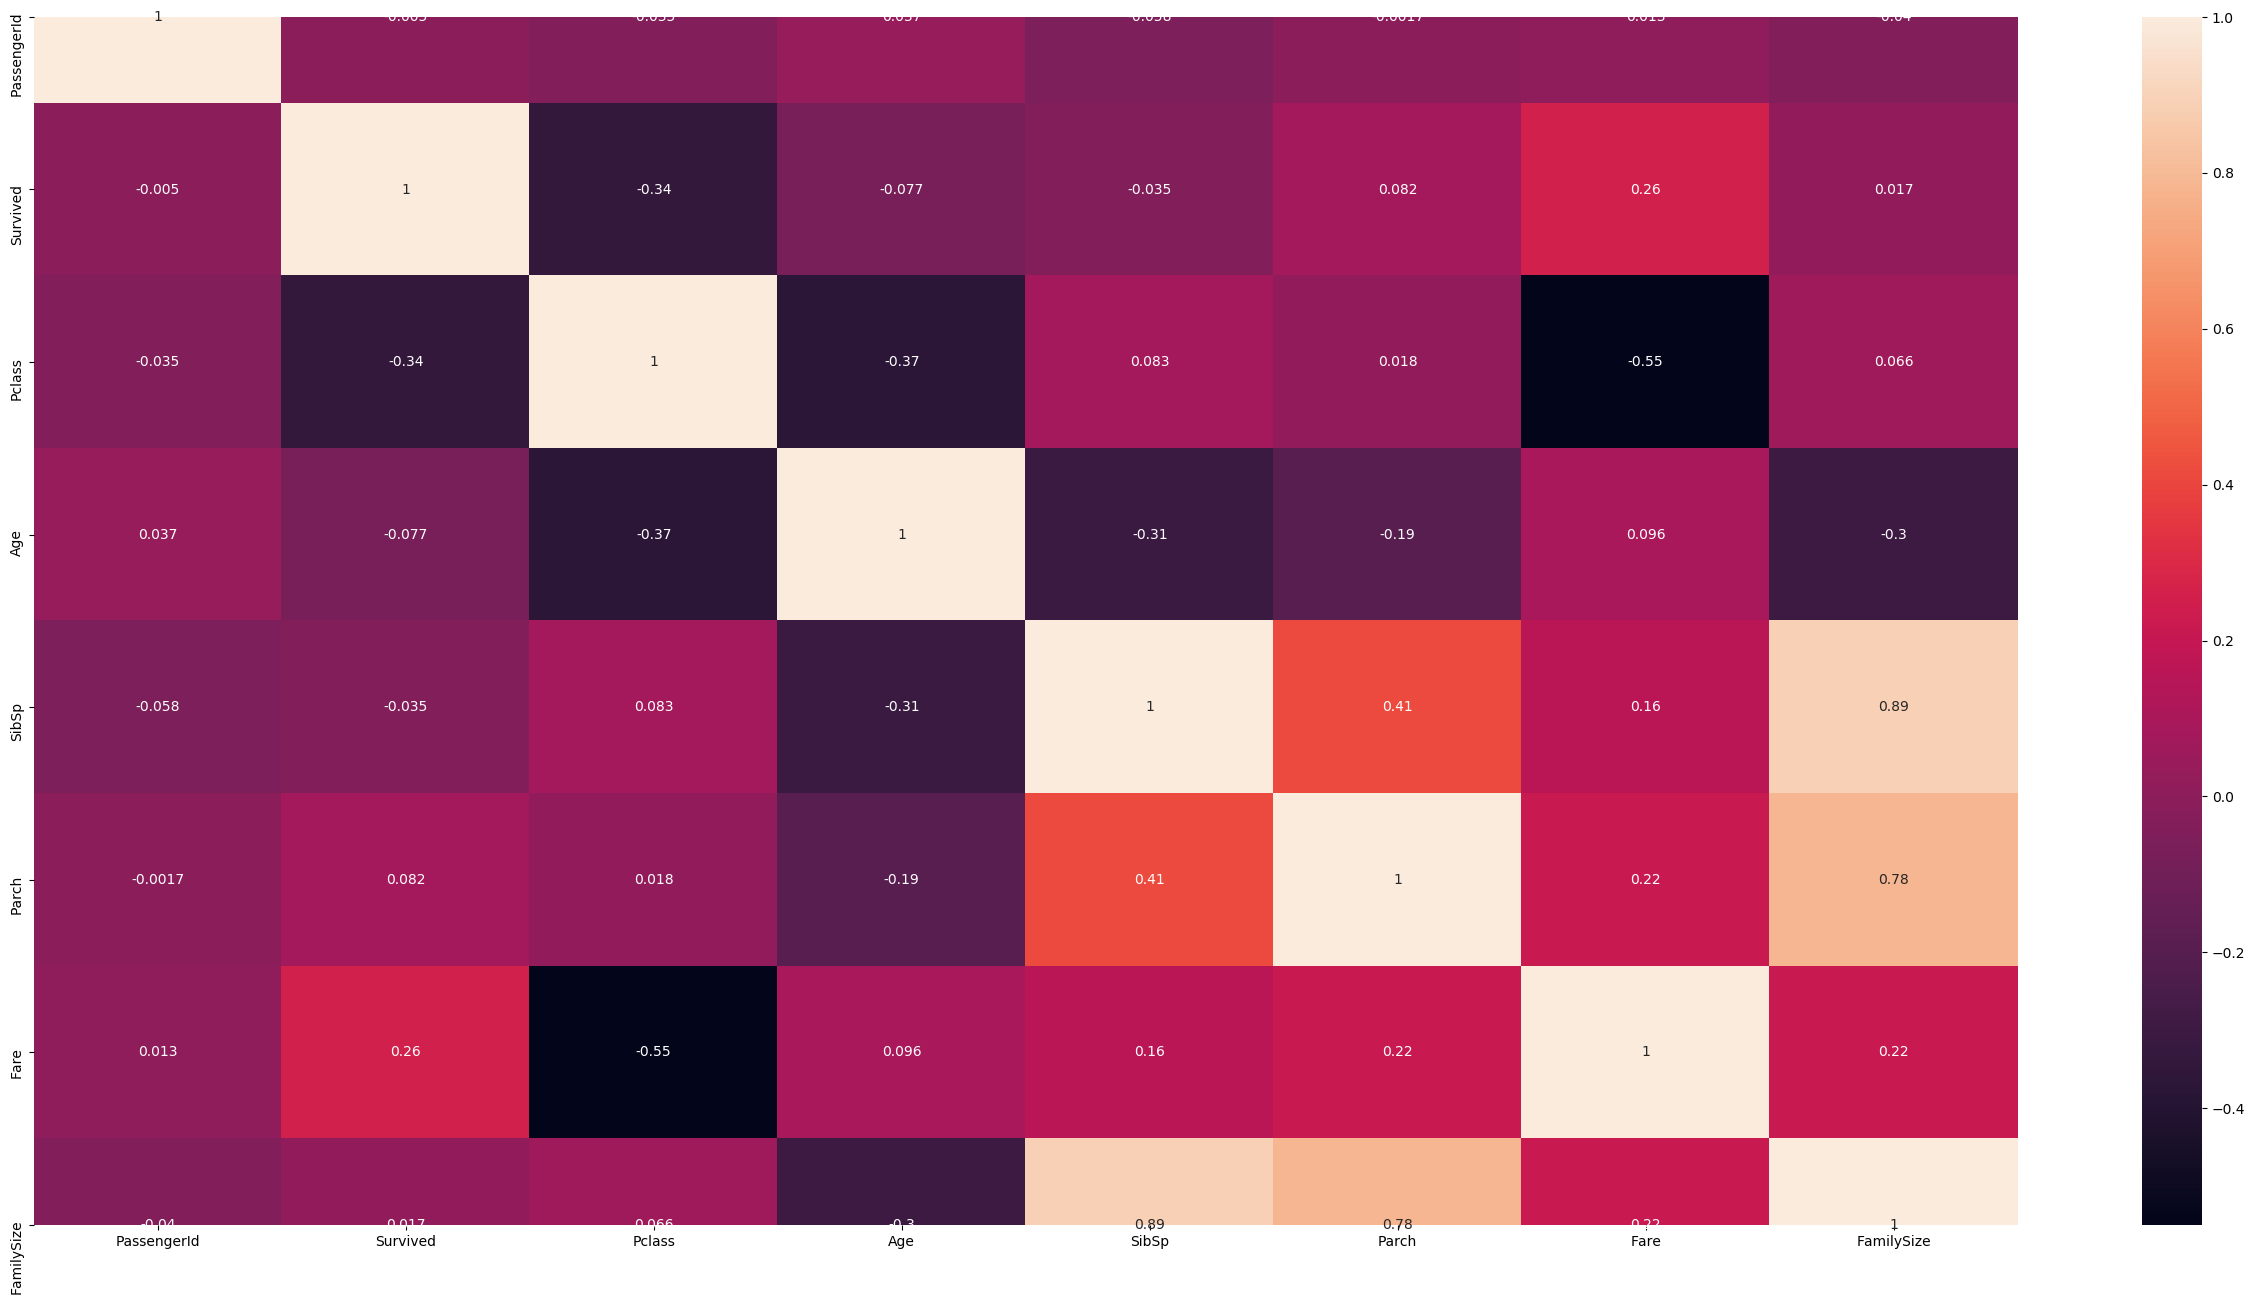

In [14]:
corr = train_df.corr()
sns.heatmap(corr, annot=True);

In [31]:
train_features = train_df.copy(deep=True)
train_features = train_features.drop("Survived", axis=1)
train_labels = train_df["Survived"].copy(deep=True)
test_features = test_df.copy(deep=True)

In [32]:
def generate_features(df):
    df['Fare'] = pd.qcut(df['Fare'], 13, labels=False)
    df['Age'] = pd.qcut(df['Age'], 10, labels=False)
    return df

In [33]:
x = generate_features(train_features)

In [34]:
x

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CabinName,FamilySize
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1,NaN,S,NONE,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,11,C85,C,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,3,NaN,S,NONE,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,10,C123,S,C,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,3,NaN,S,NONE,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,5,NaN,S,NONE,0
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,9,B42,S,B,0
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,7,NaN,S,NONE,3
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,9,C148,C,C,0


In [30]:
help(pd.qcut)

Help on function qcut in module pandas.core.reshape.tile:

qcut(x, q, labels=None, retbins: bool = False, precision: int = 3, duplicates: str = 'raise')
    Quantile-based discretization function.
    
    Discretize variable into equal-sized buckets based on rank or based
    on sample quantiles. For example 1000 values for 10 quantiles would
    produce a Categorical object indicating quantile membership for each data point.
    
    Parameters
    ----------
    x : 1d ndarray or Series
    q : int or list-like of float
        Number of quantiles. 10 for deciles, 4 for quartiles, etc. Alternately
        array of quantiles, e.g. [0, .25, .5, .75, 1.] for quartiles.
    labels : array or False, default None
        Used as labels for the resulting bins. Must be of the same length as
        the resulting bins. If False, return only integer indicators of the
        bins. If True, raises an error.
    retbins : bool, optional
        Whether to return the (bins, labels) or not. Can b